# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Mutia Aulia

#Landasan Teori


## Menentukan Pertanyaan Bisnis

**- Pertanyaan 1: Bagaimana tren rata-rata bulanan tingkat polusi PM2.5 di Beijing sepanjang tahun 2013 hingga 2017, dan pada bulan apa polusi mencapai titik tertinggi secara konsisten ?**

**- Pertanyaan 2: Stasiun manakah yang memiliki rata-rata tingkat polusi tertinggi dan terendah, serta bagaimana perbandingan kualitas udara antara area pusat kota (seperti Dongsi) dibandingkan area pinggiran (seperti Huairou) ?**

**- Pertanyaan 3: Seberapa signifikan pengaruh faktor cuaca, spesifiknya Curah Hujan (RAIN) dan Kecepatan Angin (WSPM), terhadap penurunan konsentrasi PM2.5 ?**

## Import Semua Packages/Library yang Digunakan

In [185]:
!pip install streamlit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import streamlit as st
import datetime
import matplotlib.cm as cm
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [ ]:
aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
huairou_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
gucheng_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")

df_all = pd.concat([
    aotizhongxin_df, changping_df, dingling_df, dongsi_df, wanshouxigong_df,
    wanliu_df, tiantan_df, shunyi_df, nongzhanguan_df, huairou_df,
    gucheng_df, guanyuan_df
], axis=0, ignore_index=True)

print ("Ukuran Data penggabungan: ", {df_all.shape})
print(df_all.head())

Ukuran Data penggabungan:  {(420768, 18)}
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


**Insight:**
- Data ini mencakup rentan dari Maret 2013 - Februari 2017 yakni 4 tahun penuh, dengan data 4 tahun ini kita dapat melihat pola musiman. Sehingga kita dapat memprediksi bulan dengan kualitas udara terburuk tiap tahunnya.

- Dengan adanya data dari polutan (PM 2.5, PM10, SO2, NO2, CO, dan O3) dengan data dari cuaca seperti (TEMP(Suhu), PRES (Tekanan), DEWP (Embun), RAIN (Hujan), dan WSPM (Kecepatan Angin)) kita dapat melakukan analisis korelasi untuk membuktikan hipotesis apakah hujan dan angin kencang dapat menurunkan tingkat polusi ?

### Assessing Data

=== CEK TIPE DATA & GAMBARAN UMUM ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   year      420768 non-null  int64         
 1   month     420768 non-null  int64         
 2   day       420768 non-null  int64         
 3   hour      420768 non-null  int64         
 4   PM2.5     420768 non-null  float64       
 5   PM10      420768 non-null  float64       
 6   SO2       420768 non-null  float64       
 7   NO2       420768 non-null  float64       
 8   CO        420768 non-null  float64       
 9   O3        420768 non-null  float64       
 10  TEMP      420768 non-null  float64       
 11  PRES      420768 non-null  float64       
 12  DEWP      420768 non-null  float64       
 13  RAIN      420768 non-null  float64       
 14  wd        420768 non-null  object        
 15  WSPM      420768 non-null  float64       
 16  

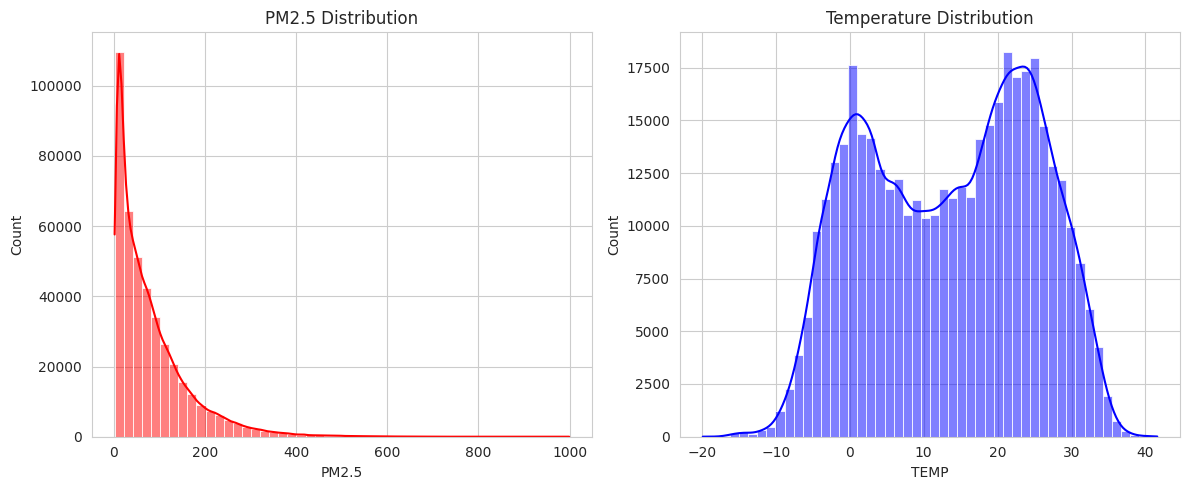

In [181]:
print("=== CEK TIPE DATA & GAMBARAN UMUM ===")
print(df_all.info())
print("\n" + "-"*50 + "\n")

print("=== CEK JUMLAH MISSING VALUES ===")
missing_values = df_all.isnull().sum()
missing_percentage = (missing_values / len(df_all)) * 100

missing_summary = pd.DataFrame({
    'Jumlah Hilang': missing_values,
    'Persentase (%)': missing_percentage.round(2)
})

print(missing_summary[missing_summary['Jumlah Hilang'] > 0].sort_values(by='Jumlah Hilang', ascending=False))
print("\n" + "-"*50 + "\n")

print("=== CEK DISTRIBUSI DATA (SKEWNESS) ===")
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
skew_values = df_all[numeric_cols].skew().sort_values(ascending=False)

print("Nilai Skewness (Kemiringan):")
print(skew_values)
print("\nKesimpulan Awal:")
for col, skew in skew_values.items():
    if skew > 1 or skew < -1:
        dist_type = "Sangat Miring (Skewed)"
        rec = "Gunakan MEDIAN"
    else:
        dist_type = "Cukup Normal"
        rec = "Bisa Gunakan MEAN"
    print(f"- {col}: {skew:.2f} -> {dist_type}. Saran: {rec}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_all['PM2.5'].dropna(), bins=50, kde=True, color='red')
plt.title('PM2.5 Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_all['TEMP'].dropna(), bins=50, kde=True, color='blue')
plt.title('Temperature Distribution')

plt.tight_layout()
plt.show()

In [ ]:
print("=== STATISTICAL ASSESSING: NORMALITY TEST (D'Agostino's K^2) ===")
print("Hipotesis Nol (H0): Distribusi data adalah Normal.")
print("Jika P-Value < 0.05, maka H0 ditolak (Data Tidak Normal).\n")

numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

results = []

for col in numeric_cols:
    data_clean = df_all[col].dropna()

    stat, p_value = stats.normaltest(data_clean)

    if p_value < 0.05:
        conclusion = "Tidak Normal"
        rec = "Median"
    else:
        conclusion = "Normal"
        rec = "Mean"

    results.append({
        'Kolom': col,
        'Statistik': round(stat, 2),
        'P-Value': p_value,
        'Kesimpulan': conclusion,
        'Saran Imputasi': rec
    })

normality_df = pd.DataFrame(results)

pd.options.display.float_format = '{:.5f}'.format

print(normality_df)

=== STATISTICAL ASSESSING: NORMALITY TEST (D'Agostino's K^2) ===
Hipotesis Nol (H0): Distribusi data adalah Normal.
Jika P-Value < 0.05, maka H0 ditolak (Data Tidak Normal).

    Kolom     Statistik  P-Value    Kesimpulan Saran Imputasi
0   PM2.5  173761.67000  0.00000  Tidak Normal         Median
1    PM10  167119.45000  0.00000  Tidak Normal         Median
2     SO2  271588.11000  0.00000  Tidak Normal         Median
3     NO2   62131.11000  0.00000  Tidak Normal         Median
4      CO  221115.52000  0.00000  Tidak Normal         Median
5      O3  148936.26000  0.00000  Tidak Normal         Median
6    TEMP  235008.38000  0.00000  Tidak Normal         Median
7    PRES   41876.85000  0.00000  Tidak Normal         Median
8    DEWP  218636.03000  0.00000  Tidak Normal         Median
9    RAIN 1090407.91000  0.00000  Tidak Normal         Median
10   WSPM  132569.51000  0.00000  Tidak Normal         Median


**Insight:**
- Uji skewness membuktikan untuk polutan PM2.5 data tidak normal, sementara untuk suhu/TEMP distribusi data tergolong normal.
- Dari hasil uji skewed dan p-values didapat bahwa distribusi dataset ini tergolong ke tidak normal maka pengisian kolom kosong dapat menggunakan median.
- Namun untuk data ini yang menggunakan datetime maka kita akan menggunakan **Forward Fill** untuk mengisi data kosong untuk menjaga pola tren.

### Cleaning Data

=== PRE-PROCESSING (DATETIME & SORTING) ===
Data berhasil diurutkan berdasarkan Stasiun dan Waktu.

=== DATA CLEANING (IMPUTASI TERINTEGRASI) ===


/tmp/ipython-input-1535850805.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_all = df_all.groupby('station').apply(fill_missing_time_series).reset_index(drop=True)


Sisa Missing Values setelah proses: 0

=== OUTLIER ANALYSIS (VISUAL CHECK) ===


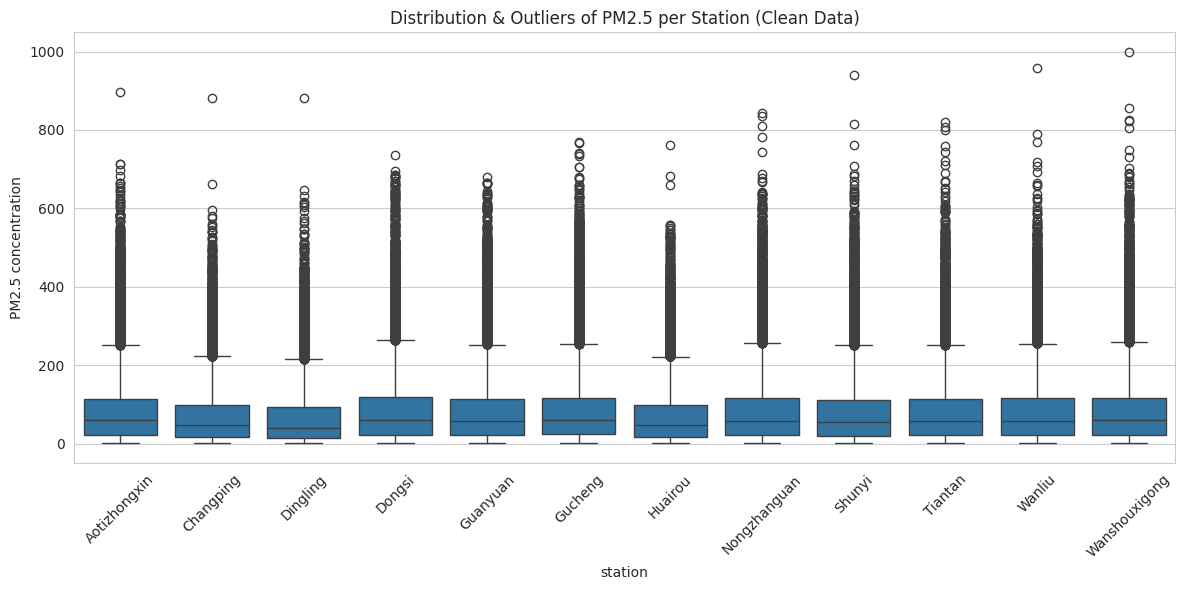

CATATAN OUTLIER: Titik hitam dibiarkan karena merepresentasikan kondisi ekstrim nyata.

=== FINALISASI & PENYIMPANAN ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   year      420768 non-null  int64         
 1   month     420768 non-null  int64         
 2   day       420768 non-null  int64         
 3   hour      420768 non-null  int64         
 4   PM2.5     420768 non-null  float64       
 5   PM10      420768 non-null  float64       
 6   SO2       420768 non-null  float64       
 7   NO2       420768 non-null  float64       
 8   CO        420768 non-null  float64       
 9   O3        420768 non-null  float64       
 10  TEMP      420768 non-null  float64       
 11  PRES      420768 non-null  float64       
 12  DEWP      420768 non-null  float64       
 13  RAIN      420768 non-null  float64       
 14  wd        4

In [179]:
print("=== PRE-PROCESSING (DATETIME & SORTING) ===")

df_all['datetime'] = pd.to_datetime(df_all[['year', 'month', 'day', 'hour']])

if 'No' in df_all.columns:
    df_all.drop(columns=['No'], inplace=True)

df_all.sort_values(by=['station', 'datetime'], inplace=True)
print("Data berhasil diurutkan berdasarkan Stasiun dan Waktu.")


print("\n=== DATA CLEANING (IMPUTASI TERINTEGRASI) ===")
def fill_missing_time_series(group):
    # ffill: isi dengan data jam sebelumnya
    # bfill: isi dengan data jam sesudahnya (jika baris pertama kosong)
    return group.ffill().bfill()

df_all = df_all.groupby('station').apply(fill_missing_time_series).reset_index(drop=True)

missing_count = df_all.isna().sum().sum()
print(f"Sisa Missing Values setelah proses: {missing_count}")


print("\n=== OUTLIER ANALYSIS (VISUAL CHECK) ===")

plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='PM2.5', data=df_all)
plt.title('Distribution & Outliers of PM2.5 per Station (Clean Data)')
plt.xticks(rotation=45)
plt.ylabel('PM2.5 concentration')
plt.tight_layout()
plt.show()

print("CATATAN OUTLIER: Titik hitam dibiarkan karena merepresentasikan kondisi ekstrim nyata.")


print("\n=== FINALISASI & PENYIMPANAN ===")
print(df_all.info())

if missing_count == 0:
    filename = "main_data_clean_final.csv"
    df_all.to_csv(filename, index=False)
    print(f"\nSUKSES: Data bersih disimpan ke '{filename}' ✅")
else:
    print(f"\nWARNING: Masih ada data kosong! Cek kembali logika cleaning. ⚠️")

Membaca file 'main_data_clean_final.csv'...
=== MENAMPILKAN OUTLIER POLUTAN ===



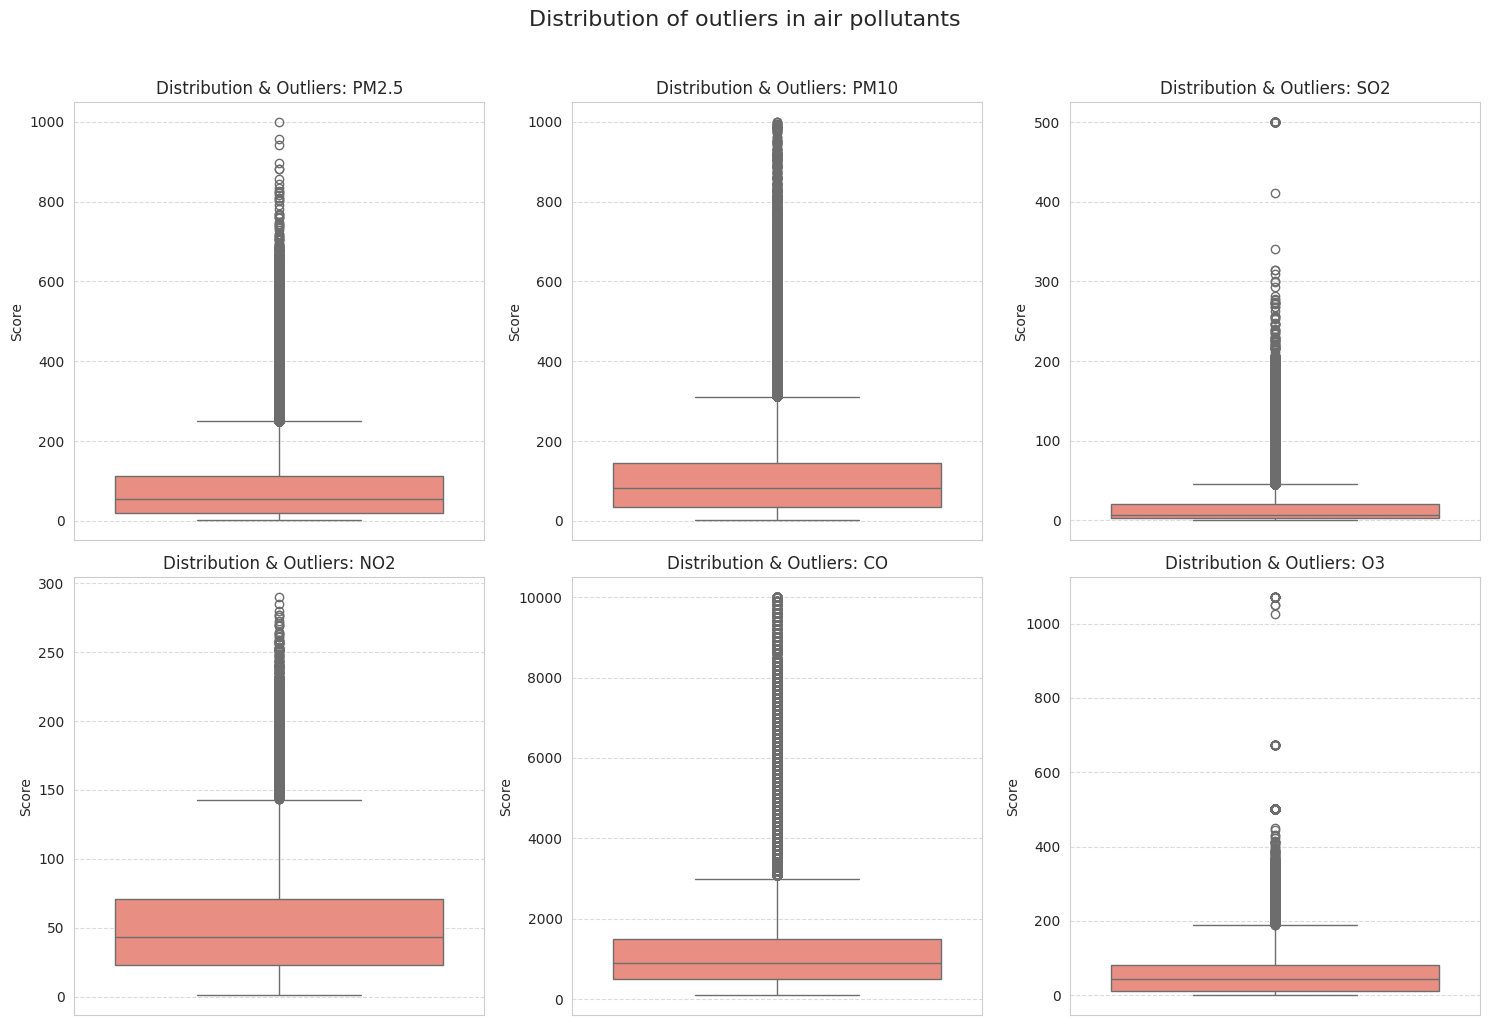


=== MENAMPILKAN OUTLIER CUACA ===



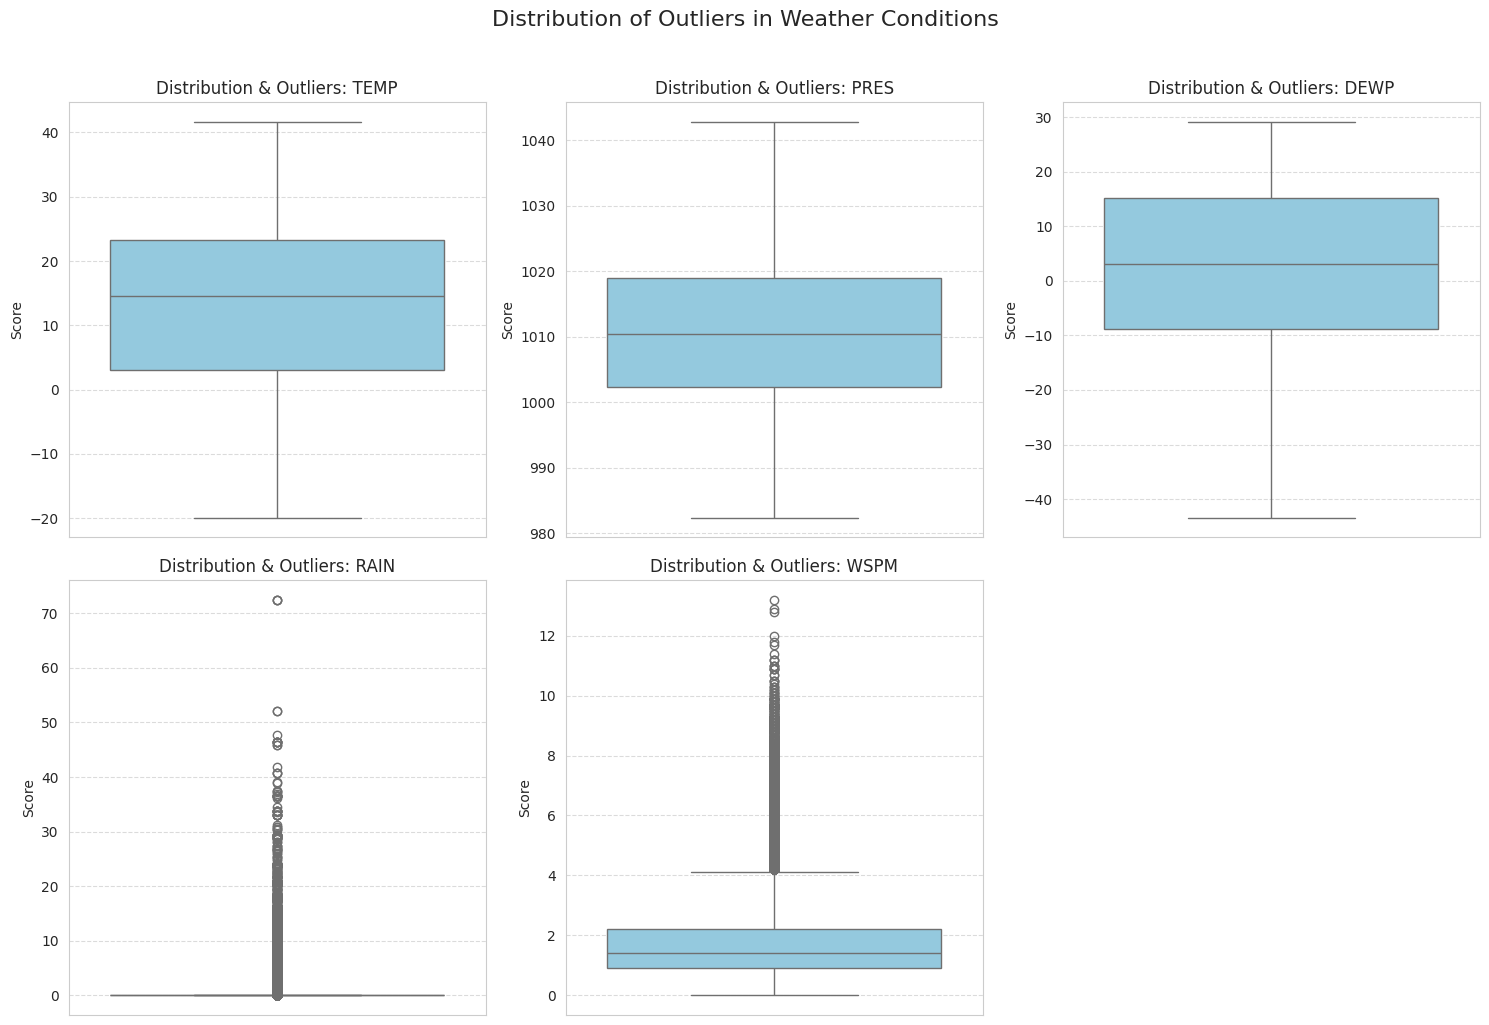


=== RINGKASAN NILAI MAKSIMUM (SANITY CHECK) ===

     PM2.5   PM10    SO2    NO2       CO      O3   TEMP    PRES   DEWP  RAIN  \
min   2.00   2.00   0.29   1.03   100.00    0.21 -19.90  982.40 -43.40  0.00   
max 999.00 999.00 500.00 290.00 10000.00 1071.00  41.60 1042.80  29.10 72.50   
50%  55.00  82.00   7.00  43.00   900.00   44.00  14.50 1010.40   3.00  0.00   

     WSPM  
min  0.00  
max 13.20  
50%  1.40  


In [178]:
filename = "main_data_clean_final.csv"
print(f"Membaca file '{filename}'...")
df = pd.read_csv(filename)

df['datetime'] = pd.to_datetime(df['datetime'])

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
weather_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

def plot_outliers(columns, title_text, color_palette):
    n_cols = 3
    n_rows = (len(columns) + 1) // 3

    plt.figure(figsize=(15, 5 * n_rows))

    for i, col in enumerate(columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(y=df[col], color=color_palette)
        plt.title(f'Distribution & Outliers: {col}')
        plt.ylabel('Score')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.suptitle(title_text, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

print("=== MENAMPILKAN OUTLIER POLUTAN ===\n")
plot_outliers(pollutants, 'Distribution of outliers in air pollutants', 'salmon')

print("\n=== MENAMPILKAN OUTLIER CUACA ===\n")
plot_outliers(weather_cols, 'Distribution of Outliers in Weather Conditions', 'skyblue')

print("\n=== RINGKASAN NILAI MAKSIMUM (SANITY CHECK) ===\n")
cek_fisika = df[pollutants + weather_cols].describe().loc[['min', 'max', '50%']]
print(cek_fisika)

**Insight:**
- Membersihkan kolom-kolom yang tidak penting atau tidak relevan meningkatkan keterbacaan dan kualitas dataset untuk analisis lebih lanjut.
- Data yang telah dibersihkan dan disimpan dalam format yang tepat memungkinkanuntuk memulai analisis data dengan lebih cepat dan menghindari masalah teknis selama pengolahan lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Descriptive Statistics

In [167]:
df = pd.read_csv("main_data_clean_final.csv")
df.info()

df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
print("Data berhasil dimuat. Range tahun:", df['year'].min(), "-", df['year'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   year      420768 non-null  int64  
 1   month     420768 non-null  int64  
 2   day       420768 non-null  int64  
 3   hour      420768 non-null  int64  
 4   PM2.5     420768 non-null  float64
 5   PM10      420768 non-null  float64
 6   SO2       420768 non-null  float64
 7   NO2       420768 non-null  float64
 8   CO        420768 non-null  float64
 9   O3        420768 non-null  float64
 10  TEMP      420768 non-null  float64
 11  PRES      420768 non-null  float64
 12  DEWP      420768 non-null  float64
 13  RAIN      420768 non-null  float64
 14  wd        420768 non-null  object 
 15  WSPM      420768 non-null  float64
 16  station   420768 non-null  object 
 17  datetime  420768 non-null  object 
dtypes: float64(11), int64(4), object(3)
memory usage: 57.8+ MB
Data berhasil dimuat. Ran

In [ ]:
cols_analysis = ['PM2.5', 'PM10', 'TEMP', 'PRES', 'RAIN', 'WSPM']
desc_stats = df[cols_analysis].describe().T[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
display(desc_stats)

print("\nInterpretasi Singkat:")
print(f"- Rata-rata PM2.5 adalah {desc_stats.loc['PM2.5', 'mean']:.2f} µg/m3.")
print(f"- Suhu rata-rata adalah {desc_stats.loc['TEMP', 'mean']:.2f} derajat Celsius.")

,count,mean,std,min,25%,50%,75%,max
PM2.5,420768.00,80.15,81.30,2.00,20.00,55.00,112.00,999.00
PM10,420768.00,105.06,92.67,2.00,36.00,82.00,146.00,999.00
TEMP,420768.00,13.53,11.44,-19.90,3.10,14.50,23.30,41.60
PRES,420768.00,1010.75,10.47,982.40,1002.30,1010.40,1019.00,1042.80
RAIN,420768.00,0.06,0.82,0.00,0.00,0.00,0.00,72.50
WSPM,420768.00,1.73,1.25,0.00,0.90,1.40,2.20,13.20



Interpretasi Singkat:
- Rata-rata PM2.5 adalah 80.15 µg/m3.
- Suhu rata-rata adalah 13.53 derajat Celsius.


### Explore Temporal Trends (Analisis Tren Waktu)

In [ ]:
def calculate_temporal_trends(dataframe):
    monthly_trend = df.set_index('datetime').resample('ME')['PM2.5'].mean()

    seasonal_pattern = df.groupby('month')['PM2.5'].mean()
    peak_month = seasonal_pattern.idxmax()
    lowest_month = seasonal_pattern.idxmin()

    return monthly_trend, seasonal_pattern, peak_month, lowest_month

monthly_trend, seasonal_pattern, peak_month, lowest_month = calculate_temporal_trends(df)

print(f"Puncak polusi terdeteksi terjadi pada bulan ke: {peak_month}")
print(f"Polusi terendah terdeteksi terjadi pada bulan ke: {lowest_month}")

Puncak polusi terdeteksi terjadi pada bulan ke: 12
Polusi terendah terdeteksi terjadi pada bulan ke: 8


### Explore Station Comparison (Spatial Analysis)

In [90]:
def calculate_station_stats(dataframe):
    stats = dataframe.groupby('station')['PM2.5'].mean().sort_values(ascending=True)
    return stats

station_stats = calculate_station_stats(df)
print("Peringkat kualitas udara stasiun di Beijing.")
print("\n3 Stasiun dengan kualitas udara terbaik.")
display(station_stats.head(3))
print("\n3 Stasiun dengan kualitas udara terburuk.")
display(station_stats.tail(3))

Peringkat kualitas udara stasiun di Beijing.

3 Stasiun dengan kualitas udara terbaik.


,PM2.5
station,
Dingling,67.43
Huairou,69.95
Changping,71.12



3 Stasiun dengan kualitas udara terburuk.


,PM2.5
station,
Nongzhanguan,85.29
Wanshouxigong,85.36
Dongsi,86.31


## Explore Correlation between Variables

In [136]:
def calculate_correlation(dataframe):
    corr = dataframe[pollutants +['RAIN', 'WSPM', 'TEMP', 'PRES']].corr()
    sample_data = dataframe.sample(n=10000, random_state=42)

    return corr, sample_data

corr_matrix, sample_data = calculate_correlation(df)
display(corr_matrix[pollutants +['RAIN', 'WSPM', 'TEMP', 'PRES']])

,PM2.5,PM10,SO2,NO2,CO,O3,RAIN,WSPM,TEMP,PRES
PM2.5,1.00,0.88,0.47,0.65,0.77,-0.14,-0.01,-0.27,-0.13,0.02
PM10,0.88,1.00,0.45,0.64,0.69,-0.11,-0.03,-0.18,-0.10,-0.02
SO2,0.47,0.45,1.00,0.48,0.51,-0.16,-0.04,-0.11,-0.32,0.22
NO2,0.65,0.64,0.48,1.00,0.68,-0.45,-0.04,-0.39,-0.27,0.17
CO,0.77,0.69,0.51,0.68,1.00,-0.30,-0.01,-0.29,-0.33,0.19
O3,-0.14,-0.11,-0.16,-0.45,-0.30,1.00,0.02,0.29,0.58,-0.44
RAIN,-0.01,-0.03,-0.04,-0.04,-0.01,0.02,1.00,0.02,0.04,-0.06
WSPM,-0.27,-0.18,-0.11,-0.39,-0.29,0.29,0.02,1.00,0.03,0.07
TEMP,-0.13,-0.10,-0.32,-0.27,-0.33,0.58,0.04,0.03,1.00,-0.81
PRES,0.02,-0.02,0.22,0.17,0.19,-0.44,-0.06,0.07,-0.81,1.00


* Kondisi cuaca (hujan, suhu, angin) memiliki korelasi negatif dengan para polutan, sehingga Faktor cuaca ini sangat mempengaruhi penurunan konsentrasi PM2.5 yang ada di 12 stasiun Kota Beijing

**Insight:**
- Tingkat polusi PM2.5 memiliki pola musiman yang kuat. Konsentrasi polutan cenderung meningkat drastis pada bulan-bulan musim dingin (Desember - Februari) dan menurun pada musim semi/panas.
- Terdapat kesenjangan kualitas udara yang signifikan antara stasiun di pusat kota (seperti Dongsi, Gucheng) dengan stasiun di area pinggiran utara yang dekat pegunungan (seperti Huairou, Dingling).
- Kecepatan Angin (WSPM) memiliki korelasi negatif yang cukup kuat dengan PM2.5. Artinya, semakin kencang angin bertiup, semakin bersih udara (polusi tertiup pergi/terdispersi).
- Curah Hujan (RAIN) juga membantu membersihkan udara (washout effect) karena memiliki korelasi negatif dengan polutan.

## Visualization & Explanatory Analysis

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
pd.options.display.float_format = '{:.2f}'.format

### Pertanyaan 1: Bagaimana tren rata-rata bulanan tingkat polusi PM2.5 di Beijing sepanjang tahun 2013 hingga 2017, dan pada bulan apa polusi mencapai titik tertinggi secara konsisten ?

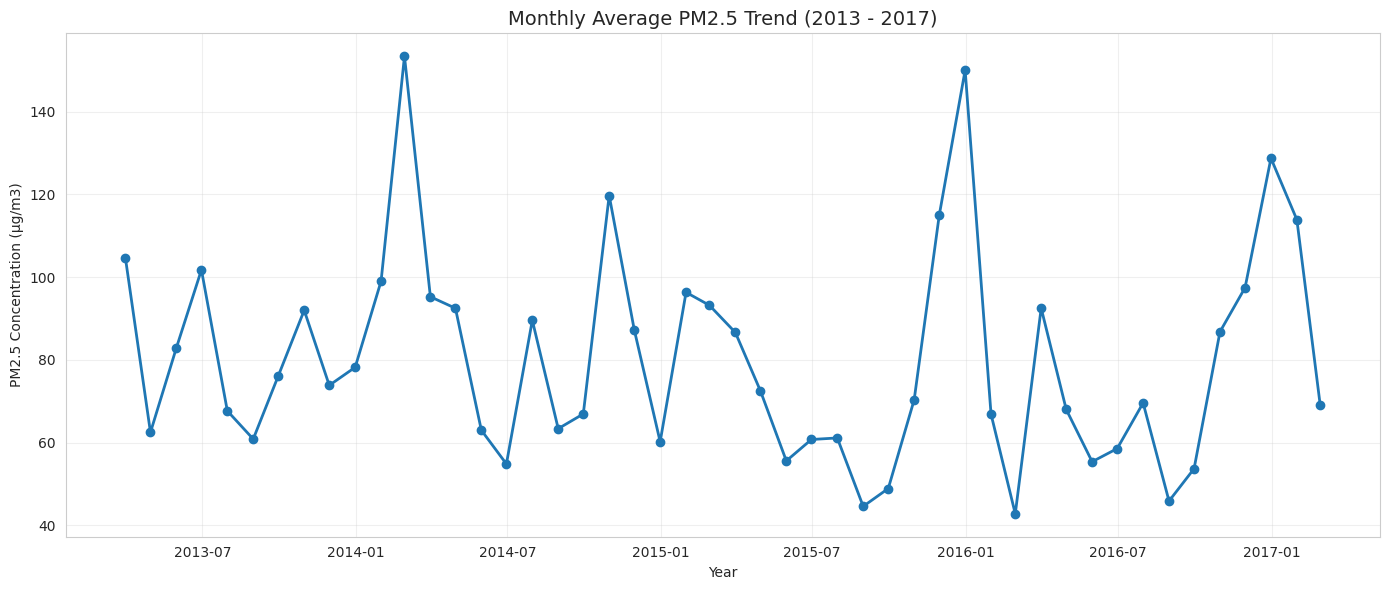

In [72]:
plt.figure(figsize=(14, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='#1f77b4', linewidth=2)
plt.title('Monthly Average PM2.5 Trend (2013 - 2017)', fontsize=14)
plt.ylabel('PM2.5 Concentration (µg/m3)')
plt.xlabel('Year')
plt.grid(True, a[15]
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
pd.options.display.float_format = '{:.2f}'.format

lpha=0.3)
plt.tight_layout()
plt.show()

* Pola tren yang menunjukkan fluktuatif terjadi pada musim dingin di Beijing sepanjang tahun 2013-2017

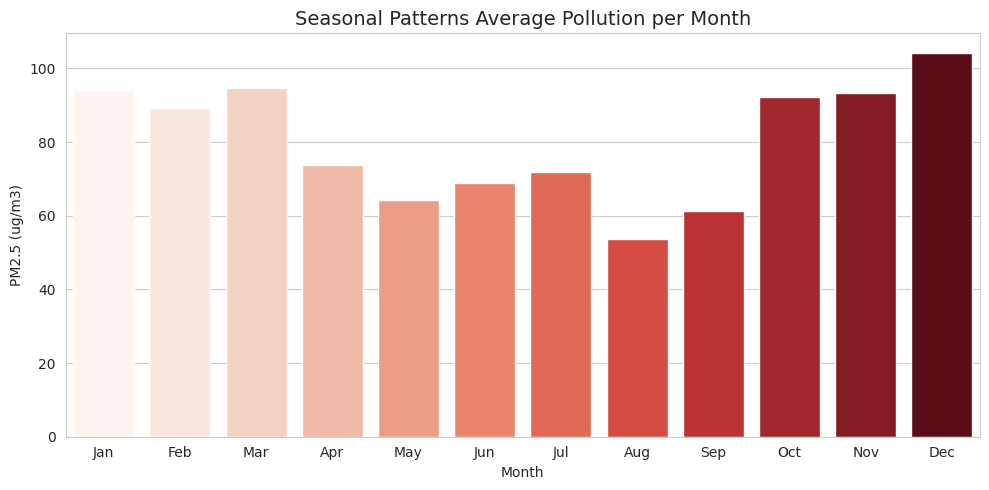

In [73]:
plt.figure(figsize=(10, 5))
sns.barplot(x=seasonal_pattern.index, y=seasonal_pattern.values, hue=seasonal_pattern.index, palette='Reds', legend=False)

plt.title('Seasonal Patterns Average Pollution per Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('PM2.5 (ug/m3)')
plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.tight_layout()
plt.show()

**Jawaban Pertanyaan 1:**
- Tren polusi fluktuatif namun konsisten tinggi di musim dingin.
- Polusi mencapai titik tertinggi secara konsisten pada bulan ke-12 (Musim Dingin) dan terendah pada bulan ke-8.

### Pertanyaan 2: Stasiun manakah yang memiliki rata-rata tingkat polusi tertinggi dan terendah, serta bagaimana perbandingan kualitas udara antara area pusat kota (seperti Dongsi) dibandingkan area pinggiran (seperti Huairou) ?

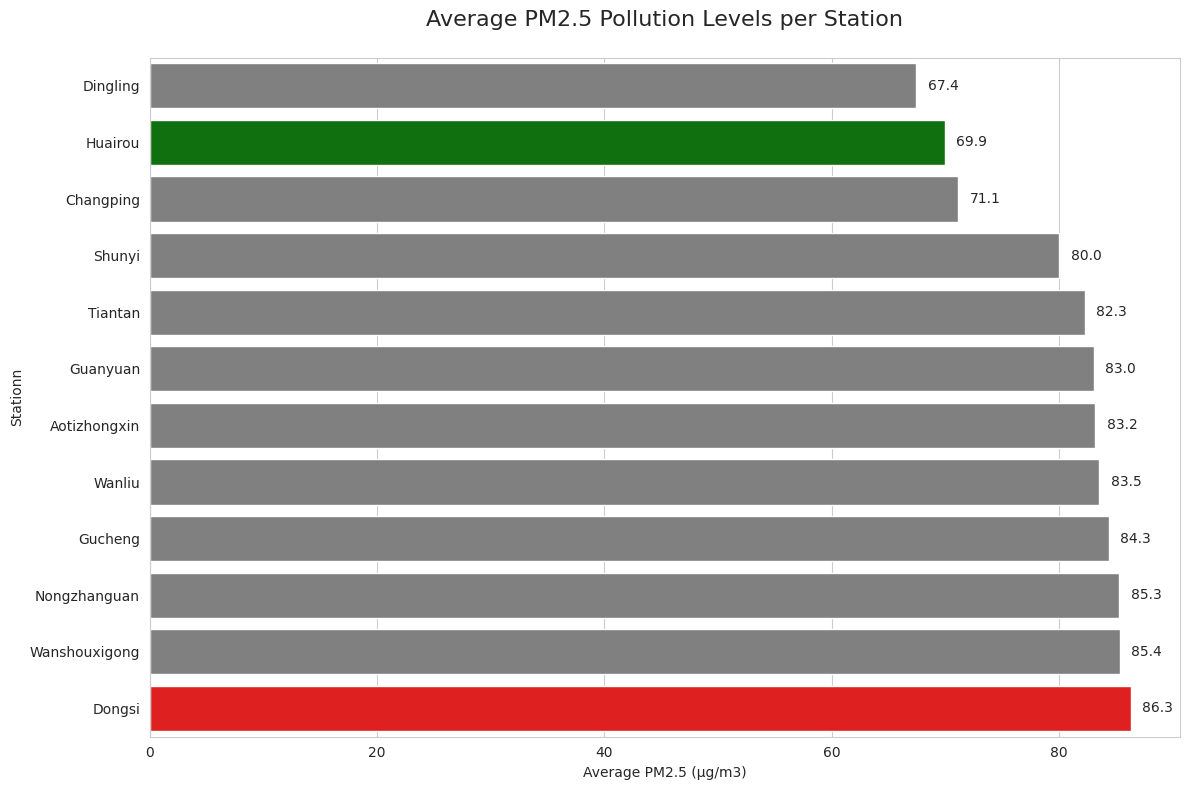

Kesimpulan: Area pusat kota (Dongsi) jauh lebih berpolusi dibanding pinggiran (Huairou).


In [91]:
plt.figure(figsize=(12, 8))
colors = ['grey' if x not in ['Dongsi', 'Huairou'] else 'red' if x=='Dongsi' else 'green' for x in station_stats.index]

sns.barplot(x=station_stats.values, y=station_stats.index, palette=colors, hue=station_stats.index, legend=False)
plt.title('Average PM2.5 Pollution Levels per Station\n', fontsize=16)
plt.xlabel('Average PM2.5 (µg/m3)')
plt.ylabel('Stationn')
plt.tight_layout()
for index, value in enumerate(station_stats.values):
    plt.text(value + 1, index, f'{value:.1f}', va='center')

plt.show()
print("Kesimpulan: Area pusat kota (Dongsi) jauh lebih berpolusi dibanding pinggiran (Huairou).")

**Jawaban Pertanyaan 2:**
* Stasiun yang memiliki rata-rata tingkat polusi terrendah adalah Dingling dengan skor 67.43, Huairou dengan skor	69.95, Changping	dengan skor 71.12.
* Stasiun yang memiliki rata-rata tingkat polusi tertinggi adalah Nongzhanguan	dengan skor 85.29, Wanshouxigong dengan skor	85.36, Dongsi	dengan skor 86.31.

* Area pusat kota (Dongsi) jauh lebih berpolusi dibanding pinggiran (Huairou)

### Pertanyaan 3: Seberapa signifikan pengaruh faktor cuaca, spesifiknya Curah Hujan (RAIN) dan Kecepatan Angin (WSPM), terhadap penurunan konsentrasi PM2.5 ?

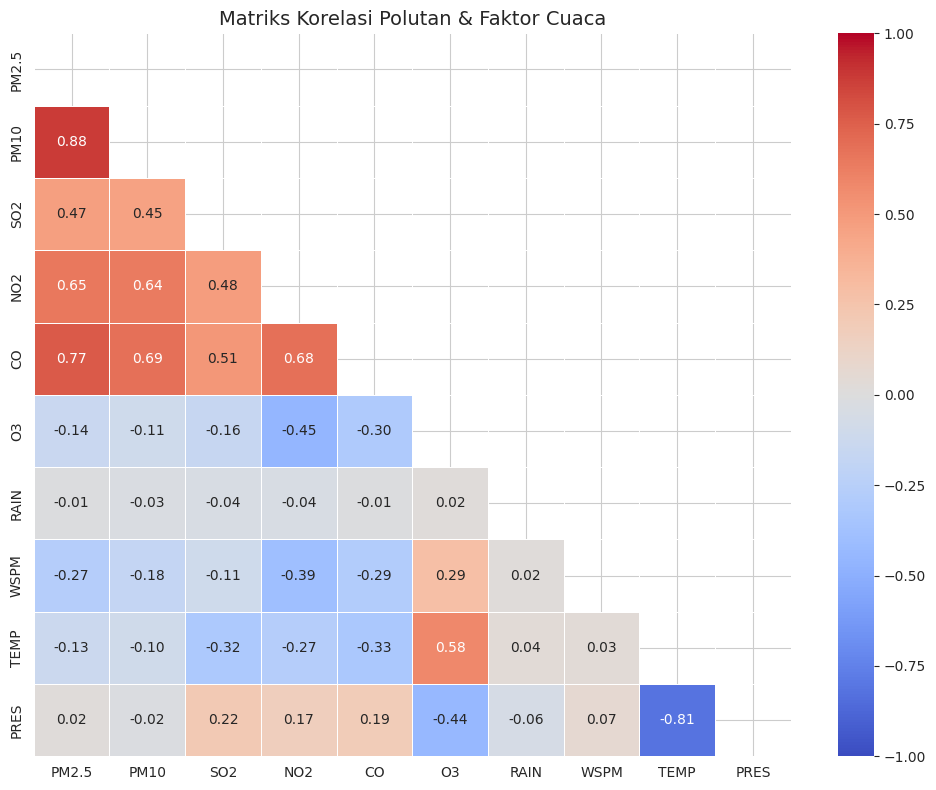

In [123]:
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

plt.title('Pollutant & Weather Factor Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

**Jawaban Pertanyaan 3:**
* Faktor cuaca memiliki korelasi negatif dengan Polutan.
* Angin (WSPM) memiliki pengaruh negatif yang lebih kuat dibanding Hujan, dan suhu lingkungan.
* Suhu (TEMP) berkorelasi negatif dengan PM2.5. Sehingga jika Suhu rendah (musim dingin) maka PM2.5 akan meningkat.

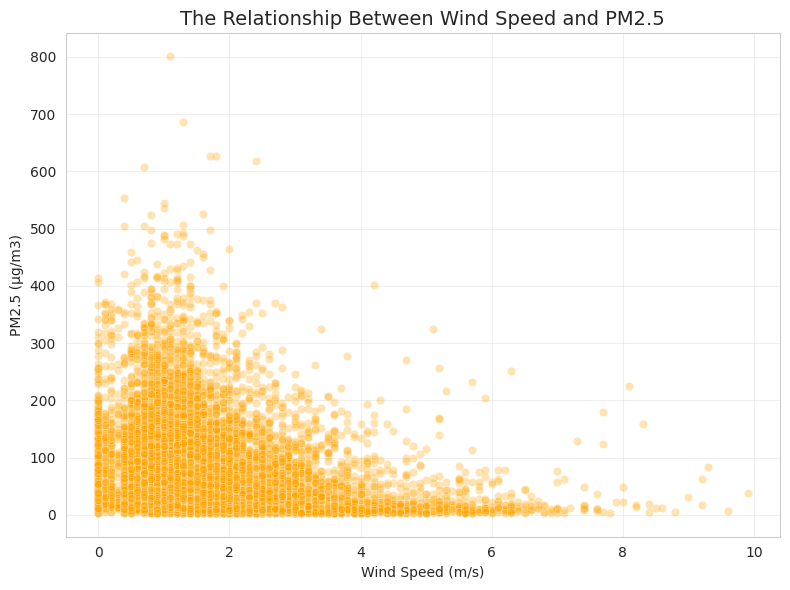

In [176]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WSPM', y='PM2.5', data=sample_data, alpha=0.3, color='orange')

plt.title('The Relationship Between Wind Speed and PM2.5', fontsize=14)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM2.5 (µg/m3)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Jawaban Pertanyaan 3:**
* Kecepatan Angin (WSPM) memiliki korelasi negatif. Artinya, semakin kencang angin, polusi cenderung menurun signifikan (tertiup angin).



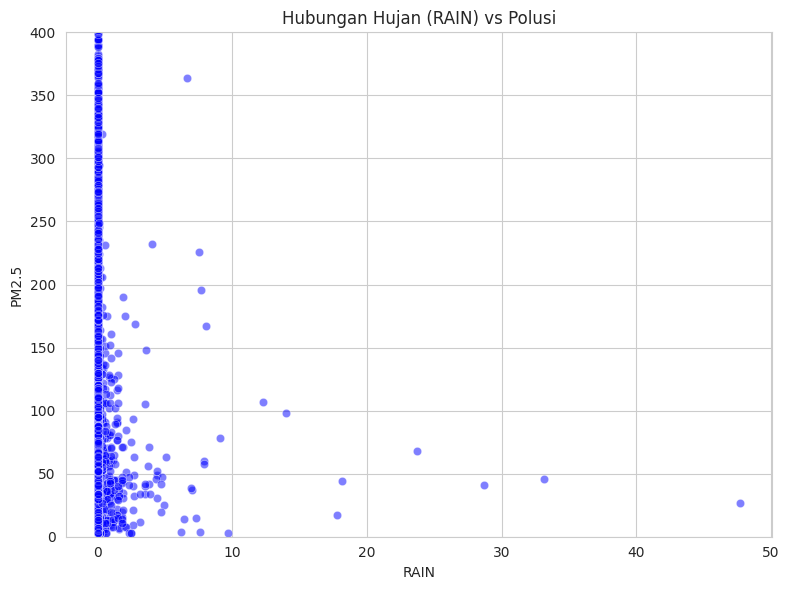

In [142]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RAIN', y='PM2.5', data=sample_data, alpha=0.5, color='blue')
plt.title('The Relationship Between Rain and Pollution')
plt.ylim(0, 400)

plt.tight_layout()
plt.show()

**Jawaban Pertanyaan 3:**
* Hujan membantu membersihkan polusi dari udara ('washout effect'), namun efek angin terlihat lebih dominan dalam data ini.

**Insight:**
- Polusi PM2.5 di Beijing memiliki pola Siklus "U-Shape" yang sangat jelas setiap tahunnya. Visualisasi membuktikan bahwa kualitas udara memburuk secara drastis di awal tahun (Januari-Februari) dan akhir tahun (November-Desember), namun membaik signifikan di pertengahan tahun (Musim Panas).
- Ada "Gap Kualitas Udara" yang nyata antara bagian Utara (Pinggiran) dan Selatan/Pusat (Perkotaan) Kota Beijing. Dimana Grafik batang menunjukkan bahwa stasiun seperti Huairou dan Dingling (warna hijau pada grafik) secara konsisten memiliki bar yang lebih pendek dibandingkan Dongsi atau Wanshouxigong (warna merah).
- Scatter plot menunjukkan pola melengkung ke bawah yang jelas: saat kecepatan angin (WSPM) naik, titik-titik polusi (PM2.5) turun drastis mendekati nol. Korelasi negatifnya lebih kuat daripada hujan.

## Analisis Lanjutan (Opsional,)

### Analisis Data Lanjutan

In [171]:
def get_aqi_score(conc, breakpoints):
    for bp in breakpoints:
        c_low, c_high, i_low, i_high = bp
        if c_low <= conc <= c_high:
            return ((i_high - i_low) / (c_high - c_low)) * (conc - c_low) + i_low
    return 500

def get_aqi_category(aqi_score):
    if aqi_score <= 50: return 'Good'
    elif aqi_score <= 100: return 'Moderate'
    elif aqi_score <= 150: return 'Unhealthy for Sensitive'
    elif aqi_score <= 200: return 'Unhealthy'
    elif aqi_score <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'

breakpoints_map = {
    'PM2.5': [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 9999, 301, 500)],
    'PM10':  [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 9999, 301, 500)],
    'SO2':   [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300), (605, 9999, 301, 500)],
    'NO2':   [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 9999, 301, 500)],
    'CO':    [(0, 4400, 0, 50), (4401, 9400, 51, 100), (9401, 12400, 101, 150), (12401, 15400, 151, 200), (15401, 30400, 201, 300), (30401, 99999, 301, 500)],
    'O3':    [(0, 108, 0, 50), (109, 140, 51, 100), (141, 164, 101, 150), (165, 204, 151, 200), (205, 404, 201, 300), (405, 9999, 301, 500)]
}

aqi_colors_map = {
    'Good': '#00e400', 'Moderate': '#ffff00',
    'Unhealthy for Sensitive': '#ff7e00', 'Unhealthy': '#ff0000',
    'Very Unhealthy': '#8f3f97', 'Hazardous': '#7e0023'
}

for pol in pollutants:
    df[f'AQI_{pol}'] = df[pol].apply(lambda x: get_aqi_score(x, breakpoints_map[pol]))


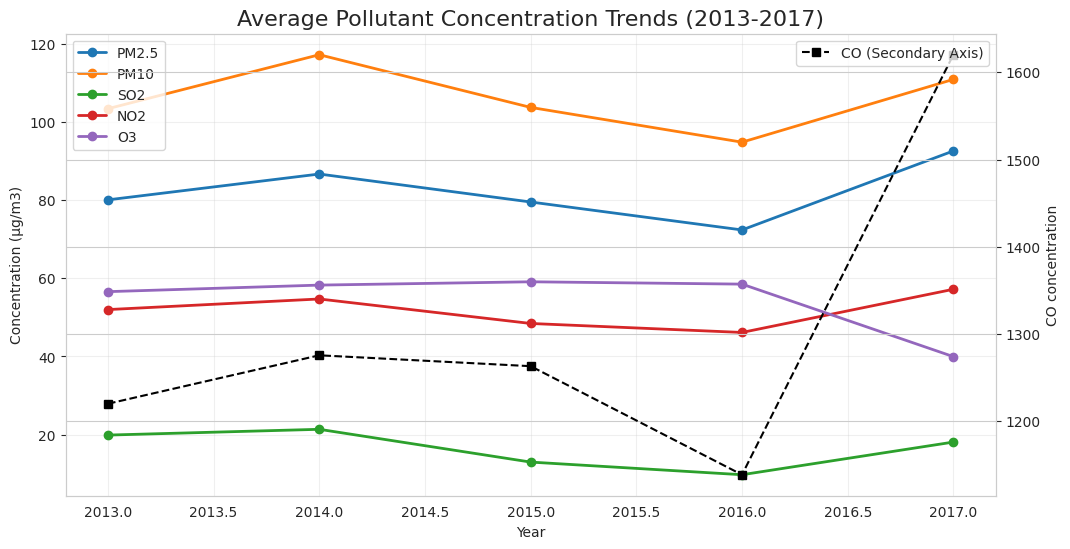

In [174]:
yearly_conc = df.groupby('year')[pollutants].mean()
fig, ax1 = plt.subplots(figsize=(12, 6))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for i, pol in enumerate(['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']):
    ax1.plot(yearly_conc.index, yearly_conc[pol], marker='o', linewidth=2, label=pol, color=colors[i])

ax1.set_xlabel('Year'); ax1.set_ylabel('Concentration (µg/m3)')
ax1.set_title('Average Pollutant Concentration Trends (2013-2017)', fontsize=16)
ax1.grid(True, alpha=0.3); ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(yearly_conc.index, yearly_conc['CO'], marker='s', linestyle='--', color='black', label='CO (Secondary Axis)')
ax2.set_ylabel('CO concentration'); ax2.legend(loc='upper right')
plt.show()

Kita dapat melihat bagaimana tren konsentrasi polutan yang ada di Kota Beijing sepanjang tahun (2013-2017). Dimana terjadi kenaikan signifikan pada awal tahun 2017 meskipun telah terjadi penurunan pada tahun 2016.

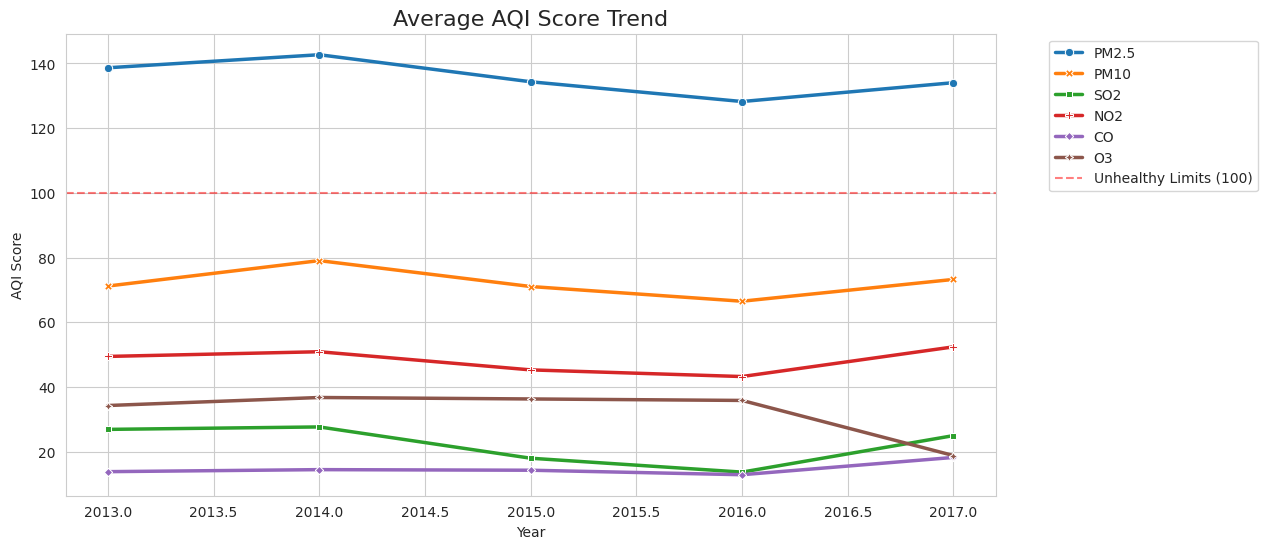

In [173]:
aqi_cols = [f'AQI_{p}' for p in pollutants]
yearly_aqi = df.groupby('year')[aqi_cols].mean()
plt.figure(figsize=(12, 6))
yearly_aqi.columns = pollutants
sns.lineplot(data=yearly_aqi, markers=True, dashes=False, linewidth=2.5)
plt.title('Average AQI Score Trend', fontsize=16)
plt.ylabel('AQI Score'); plt.xlabel('Year')
plt.axhline(100, color='red', linestyle='--', alpha=0.5, label='Unhealthy Limits (100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* Grafik ini menunjukkan tren skor AQI (Indeks Kualitas Udara) untuk berbagai polutan (PM2.5, PM10, SO2, NO2, CO, O3) selama periode tahun 2013 hingga 2017.  
* PM2.5 secara konsisten menunjukkan skor AQI tertinggi, menunjukkan kualitas udara yang buruk selama periode pengamatan.

* Tingkat SO2 dan NO2 relatif lebih rendah, tetapi tetap menunjukkan peningkatan moderat pada tahun-tahun tertentu.

* Tingkat O3 dan CO memiliki dampak yang lebih rendah terhadap AQI dibandingkan PM2.5, menunjukkan bahwa meskipun polutan ini berfluktuasi, mereka tidak menyebabkan penurunan kualitas udara yang signifikan.

* Garis "Unhelathy Limits" (100) adalah ambang batas yang memisahkan tingkat AQI tidak sehat dari yang sehat. Garis ini paling sering dilampaui oleh PM2.5, menandakan tingkat polusi tinggi yang melebihi ambang batas aman untuk kesehatan.

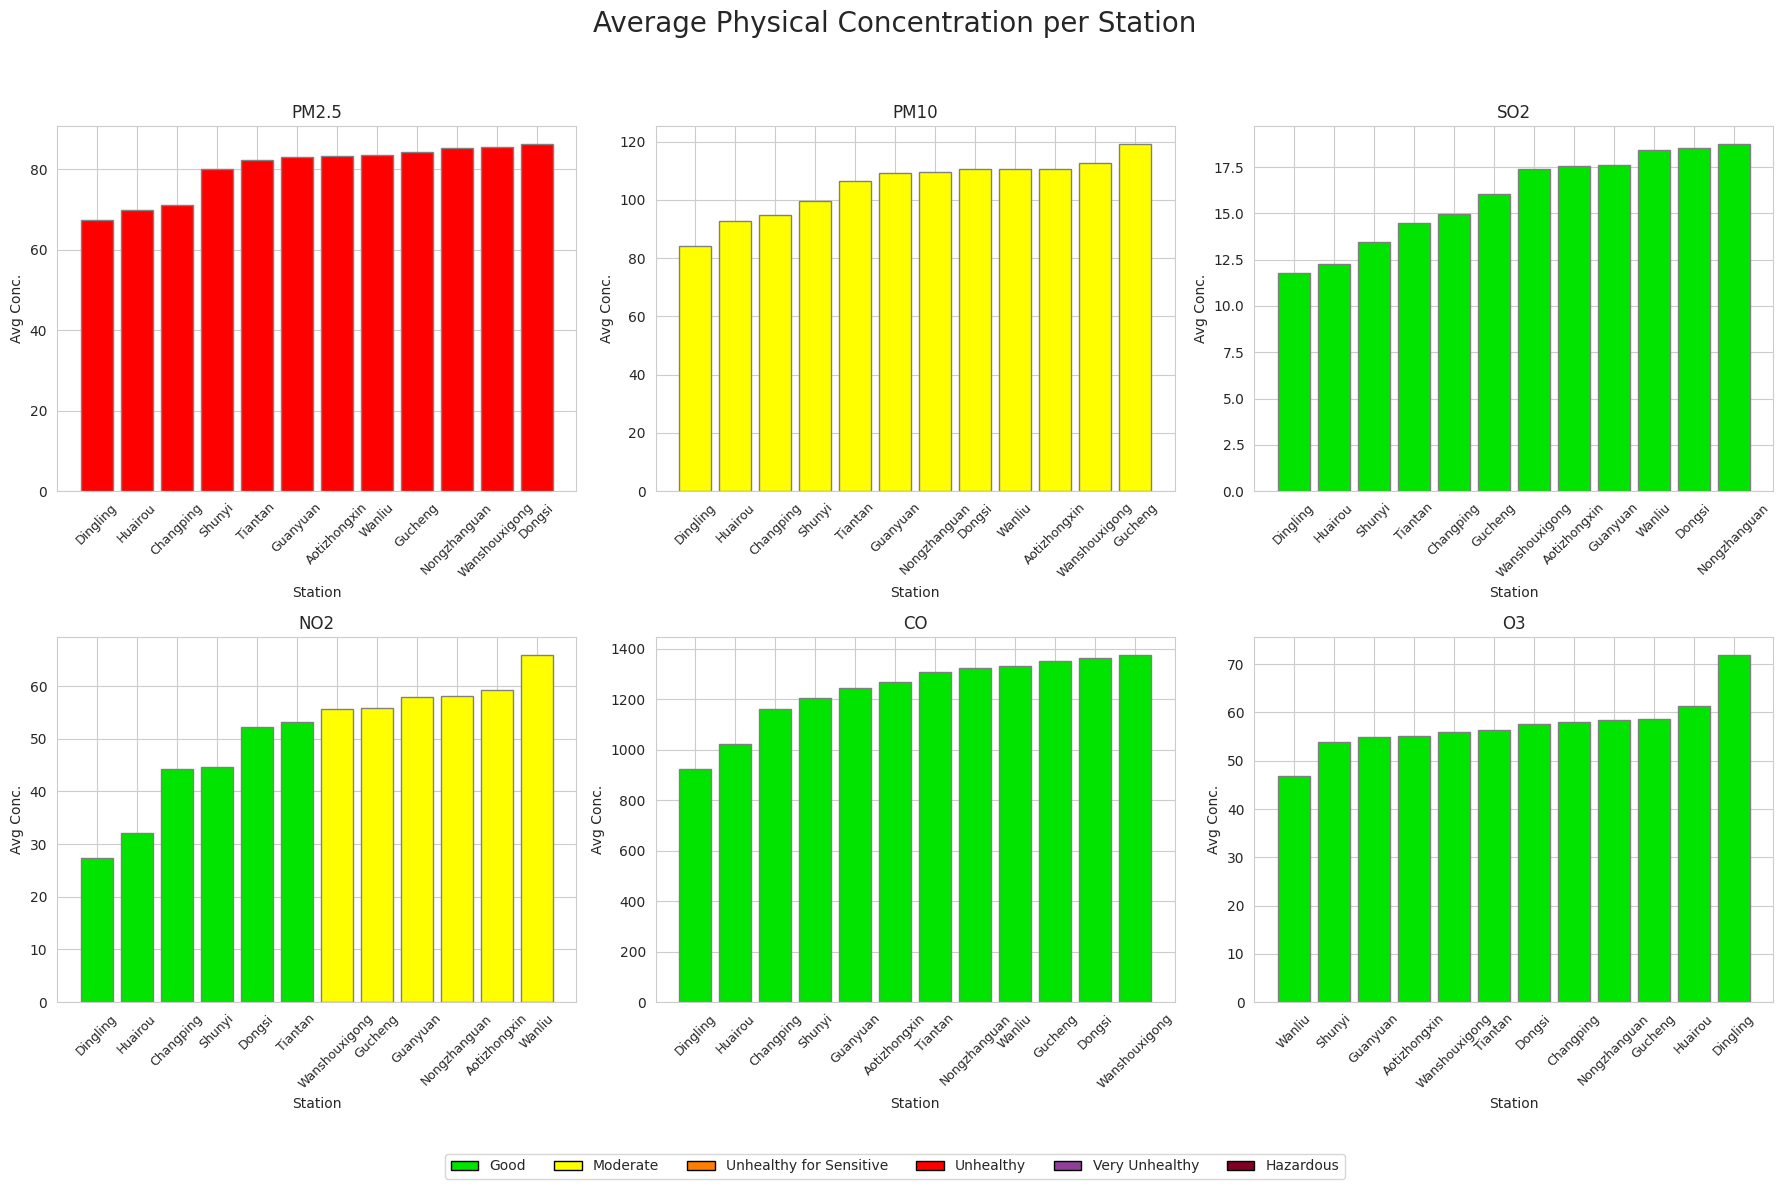

In [168]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Average Physical Concentration per Station', fontsize=20)
axes = axes.flatten()

for i, pol in enumerate(pollutants):
    ax = axes[i]
    station_mean = df.groupby('station')[pol].mean().sort_values()
    bar_colors = [aqi_colors_map[get_aqi_category(get_aqi_score(round(val), breakpoints_map[pol]))] for val in station_mean.values]
    ax.bar(station_mean.index, station_mean.values, color=bar_colors, edgecolor='grey')
    ax.set_title(f'{pol}'); ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.set_xlabel('Station')
    ax.set_ylabel('Avg Conc.')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=l) for l, c in aqi_colors_map.items()]
fig.legend(handles=legend_elements, loc='lower center', ncol=6, bbox_to_anchor=(0.5, 0.0))
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

* Konsentrasi PM2.5 tinggi di hampir semua stasiun.
* PM10 mengikuti tren serupa, dengan tingkat konsentrasi juga berada dalam rentang "moderat" hingga "tidak sehat untuk kelompok sensitif" di banyak stasiun.

* Konsentrasi SO2 dan NO2 umumnya lebih rendah, tetap berada dalam rentang "baik" hingga "sedang" di sebagian besar stasiun.

* Konsentrasi CO sebagian besar berada dalam rentang "baik", kecuali di beberapa stasiun di mana konsentrasinya mulai memasuki rentang "sedang".

* Level O3 umumnya berada dalam rentang "baik" di sebagian besar stasiun, dengan beberapa stasiun mendekati konsentrasi "sedang".

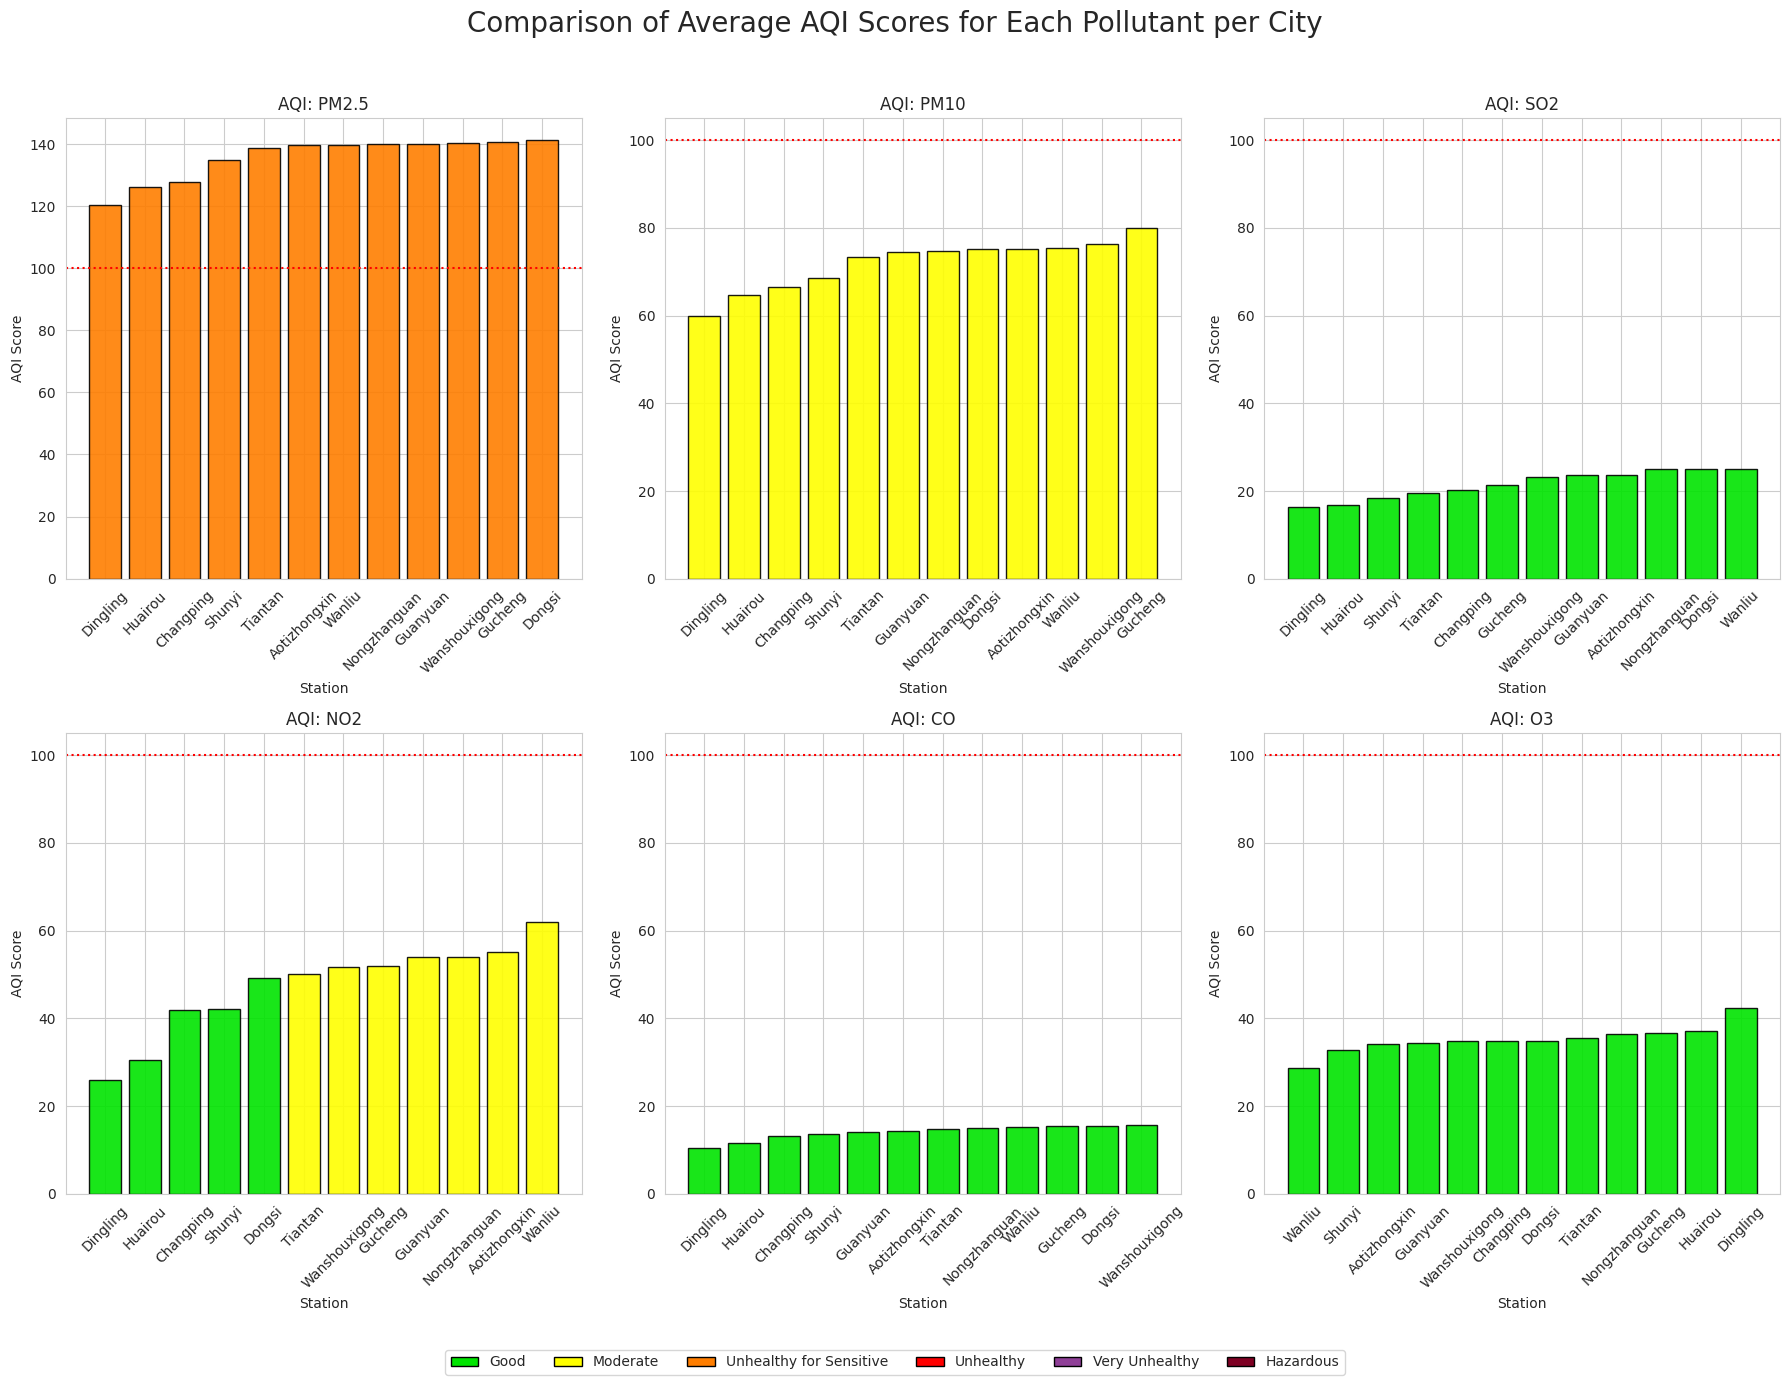

In [156]:
fig, axes = plt.subplots(2, 3, figsize=(18, 14))
fig.suptitle('Comparison of Average AQI Scores for Each Pollutant per City', fontsize=20)
axes = axes.flatten()

for i, pol in enumerate(pollutants):
    ax = axes[i]
    station_aqi_mean = df.groupby('station')[f'AQI_{pol}'].mean().sort_values()
    bar_colors = [aqi_colors_map[get_aqi_category(val)] for val in station_aqi_mean.values]
    ax.bar(station_aqi_mean.index, station_aqi_mean.values, color=bar_colors, edgecolor='black', alpha=0.9)
    ax.set_title(f'AQI: {pol}'); ax.tick_params(axis='x', rotation=45)
    ax.axhline(100, color='red', linestyle=':', alpha=1)
    ax.set_xlabel('Station')
    ax.set_ylabel('AQI Score')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=l) for l, c in aqi_colors_map.items()]

fig.legend(handles=legend_elements, loc='lower center', ncol=6, bbox_to_anchor=(0.5, 0.0))
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.show()

Grafik ini membandingkan skor AQI di berbagai stasiun untuk polutan yang berbeda.
* Dengan skor AQI pada PM2.5 termasuk kedalam golongan "tidak sehat untuk yang sensitif" disemua stasiun di Kota Beijing.
* PM10 juga menunjukkan skor AQI yang tinggi, tetapi sebagian besar stasiun berada dalam rentang "moderat".  
* SO2 umumnya menunjukkan skor AQI dalam rentang "baik" hingga "moderat", menunjukkan tingkat polusi yang lebih rendah dibandingkan dengan PM2.5 dan PM10.
* Level CO tetap berada dalam zona "baik", dengan beberapa stasiun menunjukkan peningkatan minor, tetapi tidak ada yang mencapai ambang batas yang tidak sehat.

* O3 cenderung tetap dalam rentang "baik", meskipun beberapa stasiun mendekati level "sedang".

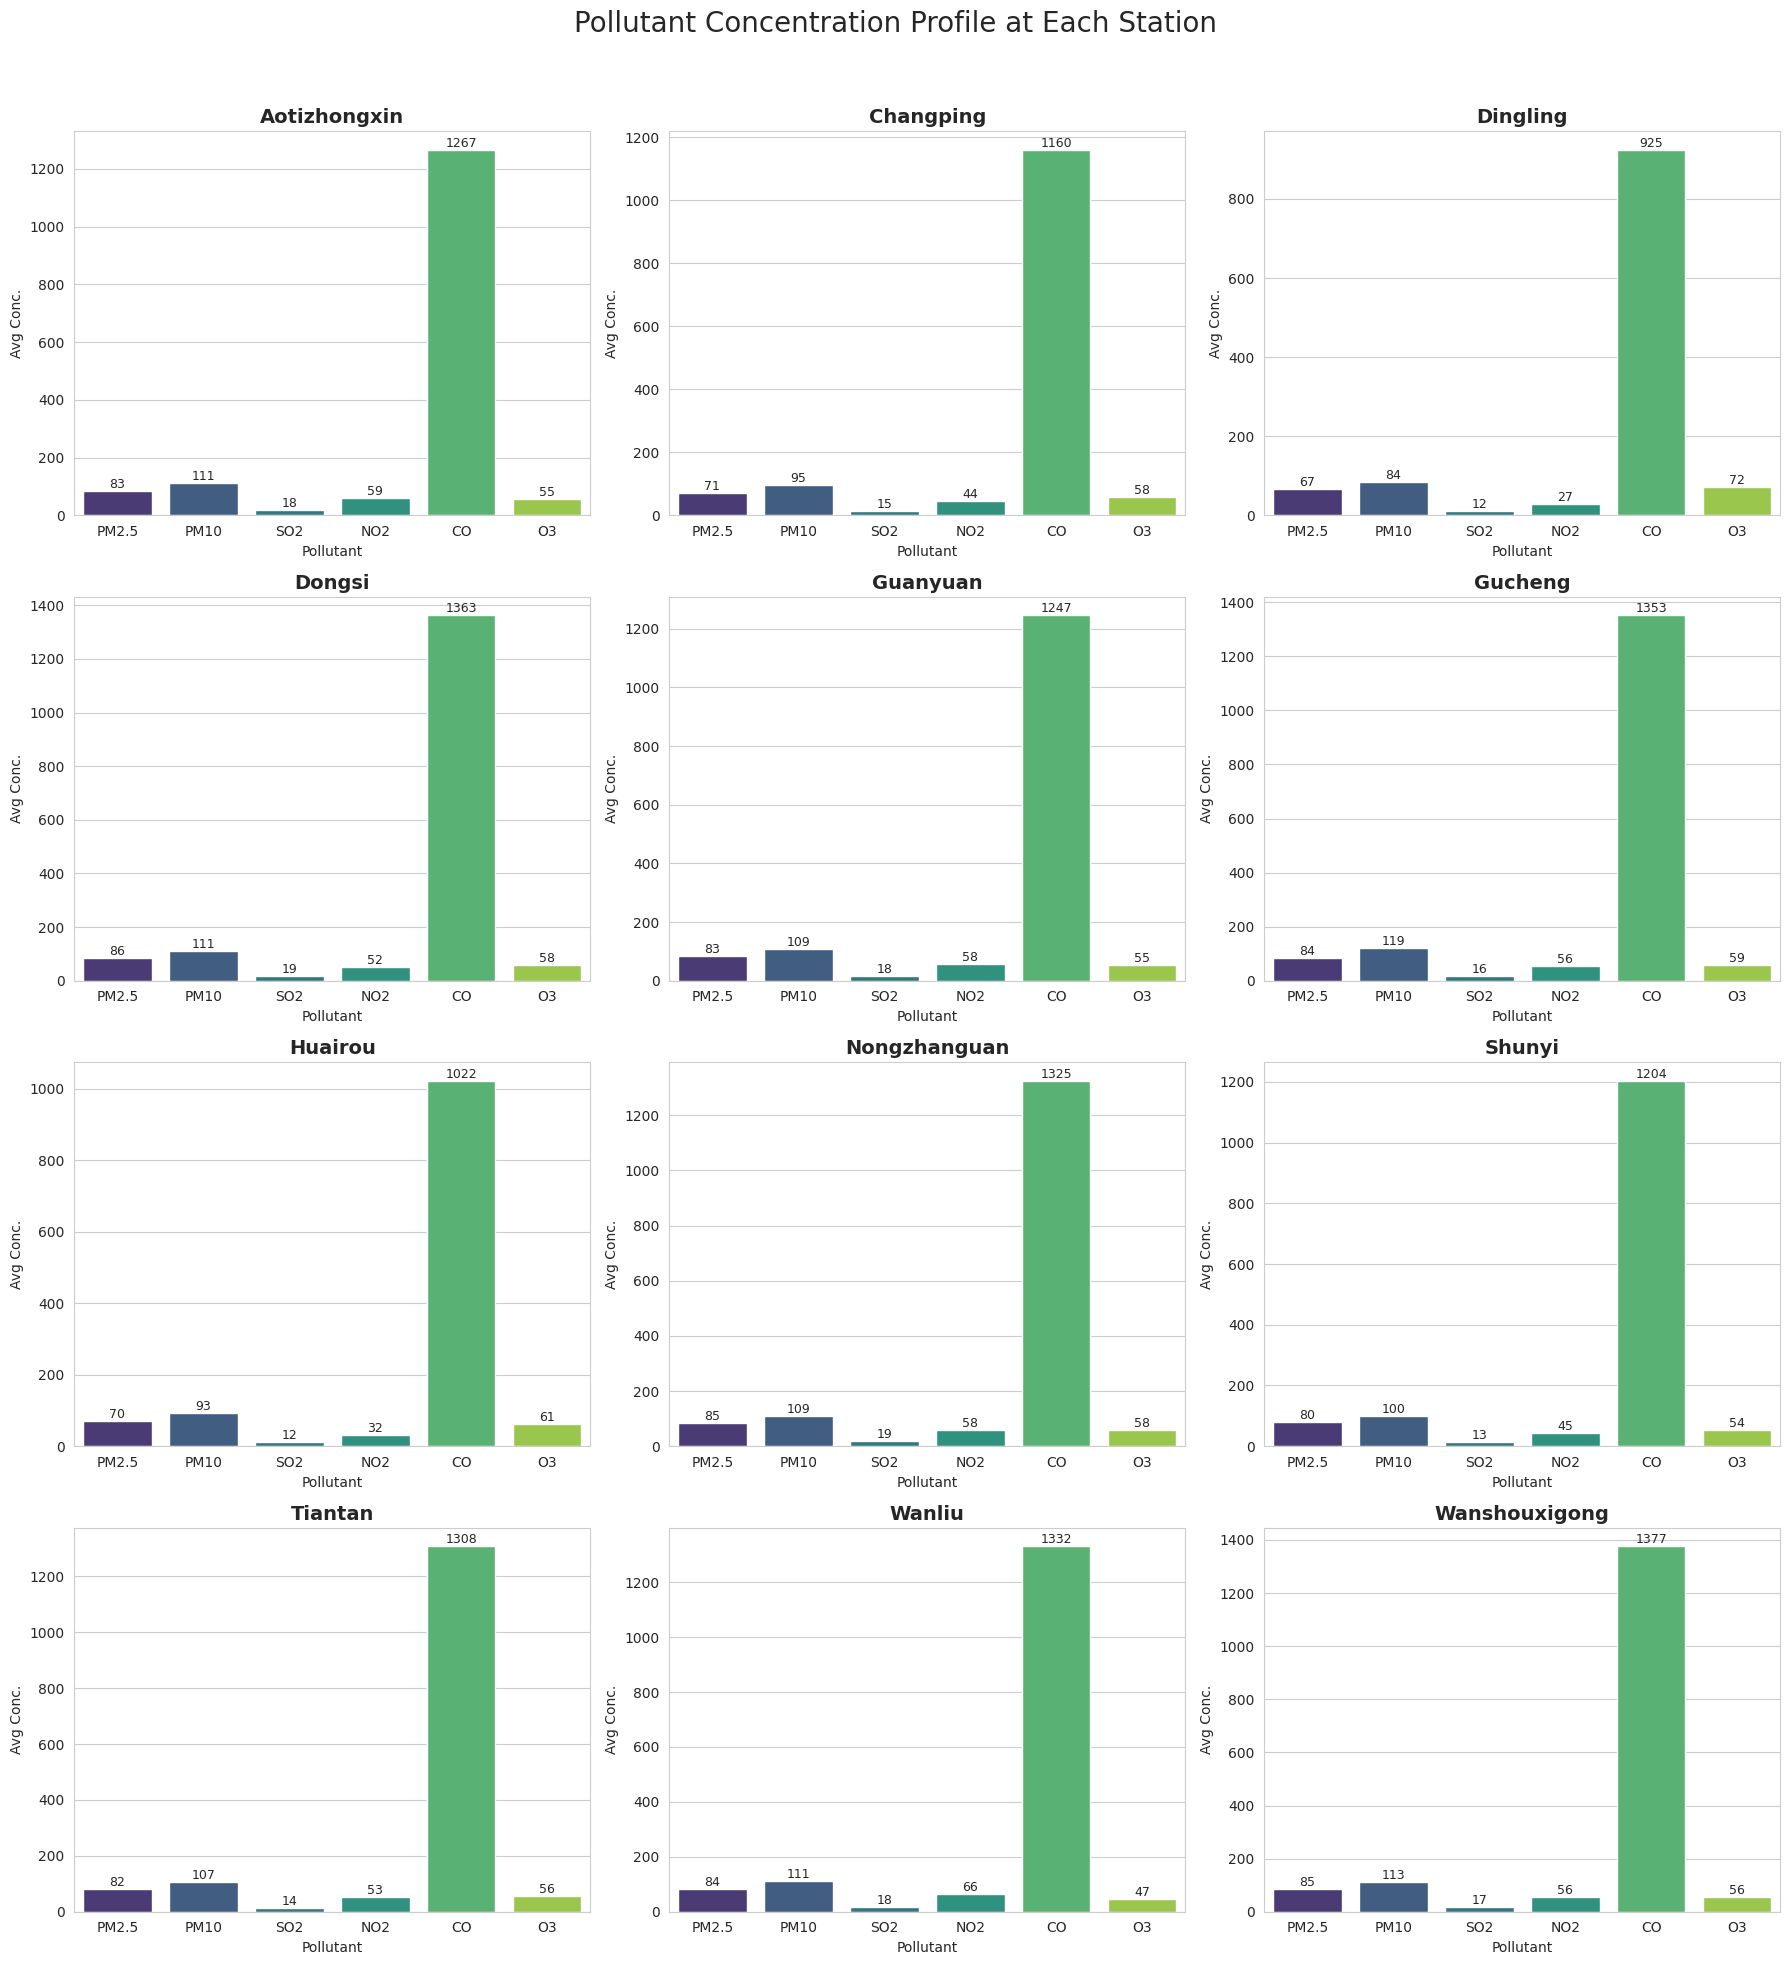

In [157]:
unique_stations = df['station'].unique()
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle('Pollutant Concentration Profile at Each Station', fontsize=20)
axes = axes.flatten()

for i, station in enumerate(unique_stations):
    ax = axes[i]
    station_data = df[df['station'] == station][pollutants].mean()
    sns.barplot(x=station_data.index, y=station_data.values, hue=station_data.index, legend=False, ax=ax, palette='viridis')
    ax.set_title(f'{station}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Pollutant')
    ax.set_ylabel('Avg Conc.')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.show()

* Konsentrasi CO jauh lebih tinggi di semua stasiun dibandingkan dengan polutan lainnya, sering kali mencapai level di atas 1000 µg/m³, menjadikannya polutan dominan di semua stasiun.

* PM2.5 dan PM10 secara konsisten lebih rendah tetapi tetap signifikan, terutama di stasiun seperti Changping dan Wanliu.

* Konsentrasi SO₂, NO₂, dan O₃ jauh lebih rendah di semua stasiun, menunjukkan bahwa polutan-polutan ini kurang menjadi perhatian dibandingkan dengan CO dan partikel halus.

* Perbedaan yang mencolok antara polutan, terutama CO, menunjukkan kontribusi yang signifikan dari polusi karbon monoksida di lokasi-lokasi ini, kemungkinan disebabkan oleh emisi industri atau lalu lintas.

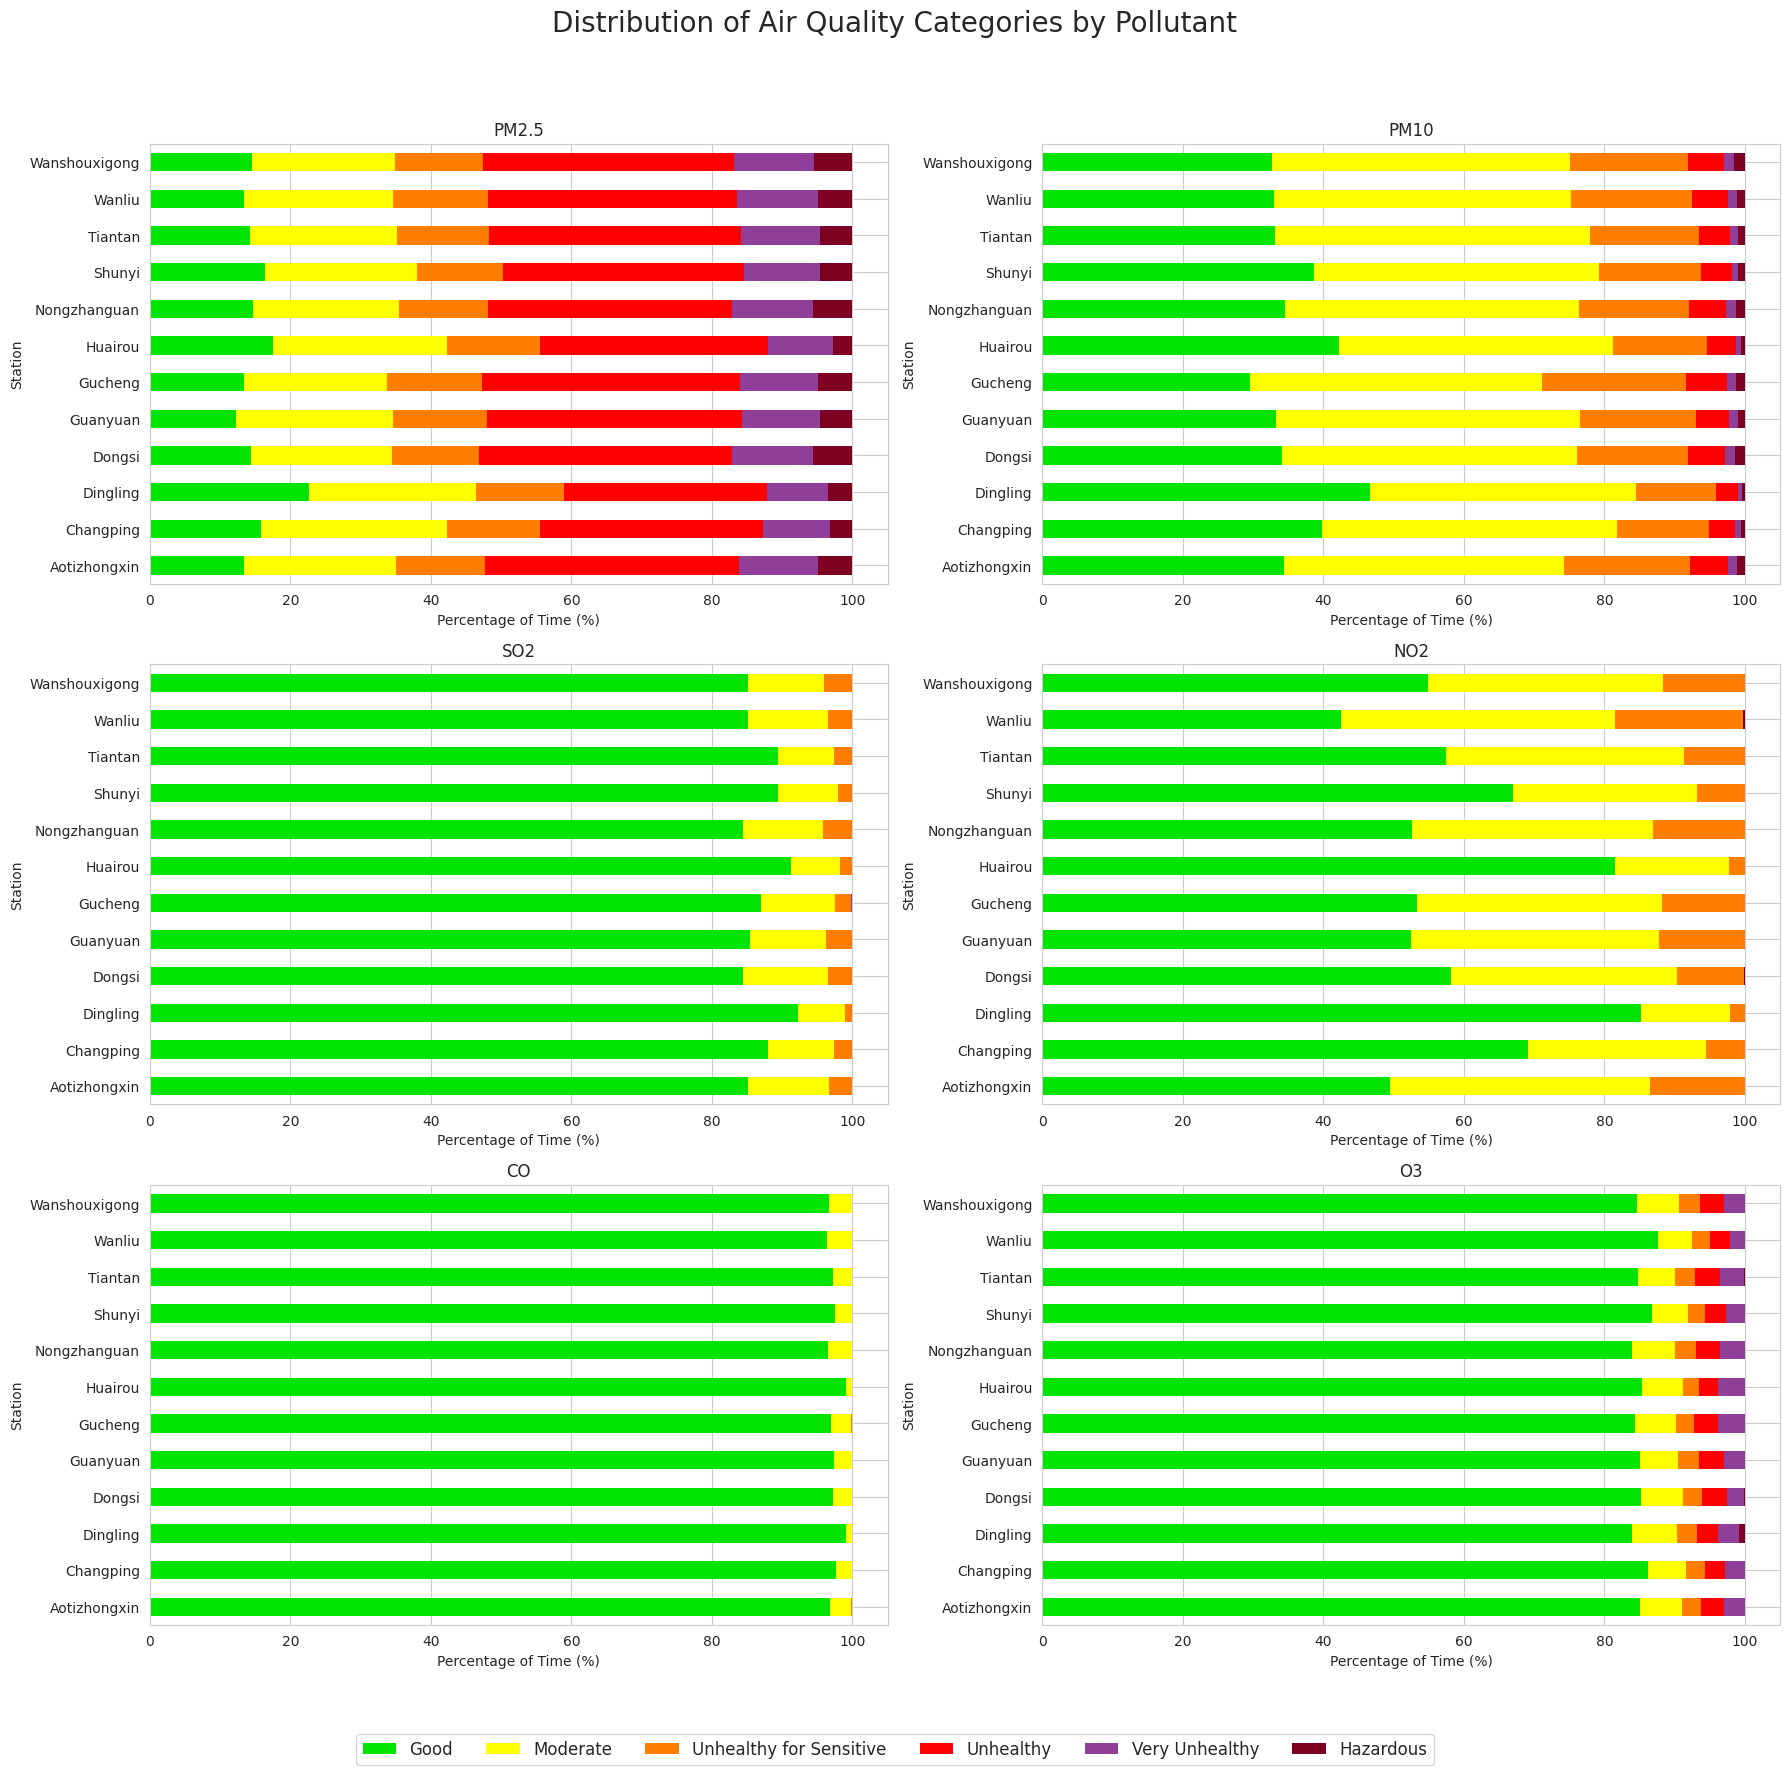

In [158]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Distribution of Air Quality Categories by Pollutant', fontsize=20)
flatten_axes = axes.flatten()

aqi_colors = {'Good': '#00e400', 'Moderate': '#ffff00', 'Unhealthy for Sensitive': '#ff7e00',
              'Unhealthy': '#ff0000', 'Very Unhealthy': '#8f3f97', 'Hazardous': '#7e0023'}

for i, pol in enumerate(pollutants):
    ax = flatten_axes[i]
    col_cat = f'Cat_{pol}'
    df[col_cat] = pd.Categorical(df[f'AQI_{pol}'].apply(get_aqi_category), categories=list(aqi_colors.keys()), ordered=True)
    ct = pd.crosstab(df['station'], df[col_cat], normalize='index') * 100
    ct.plot(kind='barh', stacked=True, ax=ax, color=[aqi_colors[x] for x in ct.columns], edgecolor='none')
    ax.set_title(f'{pol}'); ax.legend_.remove()
    ax.set_xlabel('Percentage of Time (%)')
    ax.set_ylabel('Station')

handles, labels = flatten_axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6, fontsize=12, bbox_to_anchor=(0.5, 0.0))
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

* Untuk polutan PM2.5 dan PM10 menunjukkan sebagian besar waktu berada dalam kategori Tidak Sehat hingga Sangat Tidak Sehat (kebanyakan merah dan ungu), terutama di stasiun seperti Wanshouxigong dan Wanliu.

* Untuk polutan SO2 dan NO2 sebagian besar berada dalam kategori "Baik" (hijau), dengan beberapa stasiun melampaui ke kategori "Moderat" (kuning).

* Untuk polutan CO sebagian besar berada dalam kategori "Baik", dengan hanya beberapa stasiun menunjukkan tingkat "Moderat" yang ringan.

* Untuk polutan O3 sebagian besar berada dalam kategori "Baik" hingga "Moderat", namun beberapa stasiun menunjukkan konsentrasi yang lebih tinggi, mencapai level "Tidak Sehat untuk Kelompok Rentan".

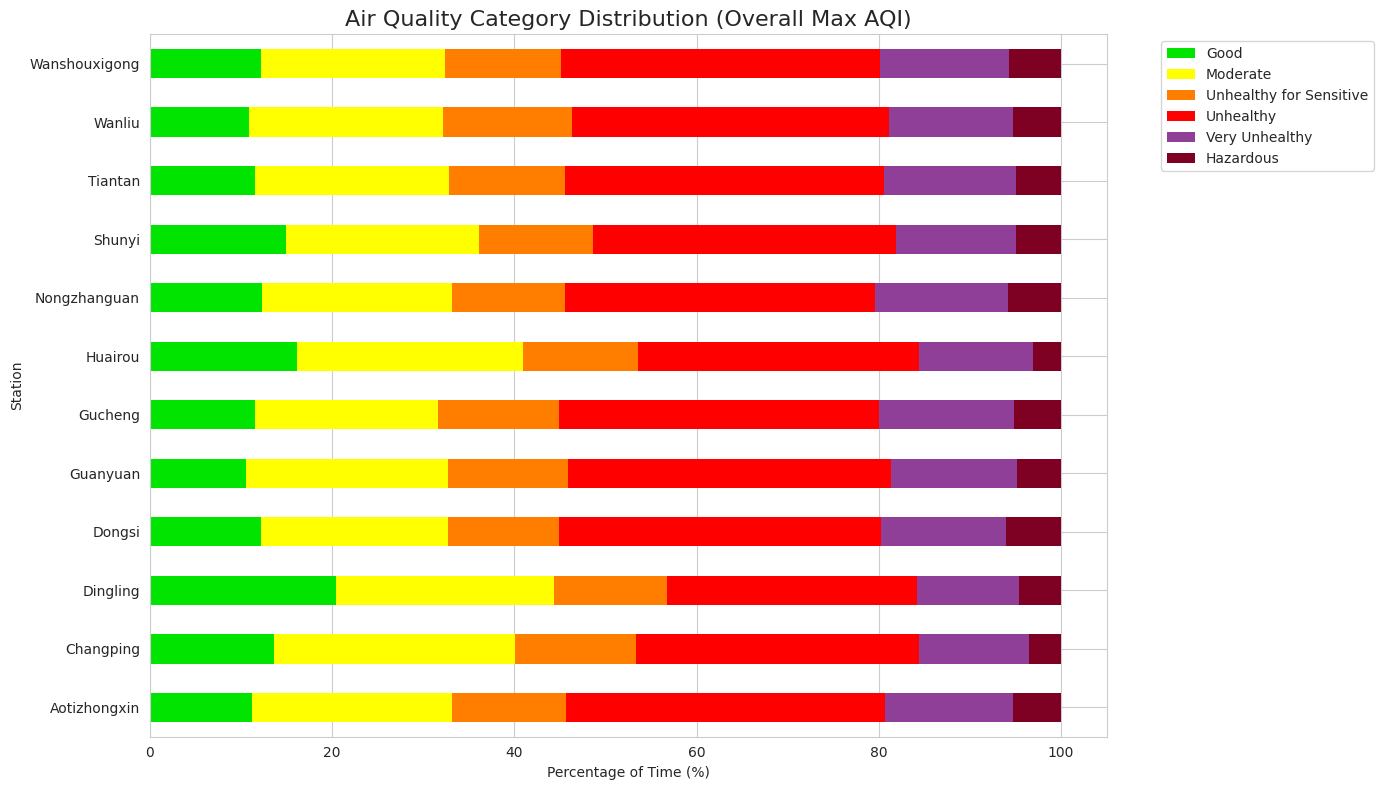

In [159]:
df['Max_AQI'] = df[[f'AQI_{p}' for p in pollutants]].max(axis=1)
df['AQI_Category'] = pd.Categorical(df['Max_AQI'].apply(get_aqi_category), categories=list(aqi_colors.keys()), ordered=True)
aqi_crosstab = pd.crosstab(df['station'], df['AQI_Category'], normalize='index') * 100
aqi_crosstab.plot(kind='barh', stacked=True, figsize=(14, 8), color=[aqi_colors[x] for x in aqi_crosstab.columns], edgecolor='none')
plt.title('Air Quality Category Distribution (Overall Max AQI)', fontsize=16)
plt.xlabel('Percentage of Time (%)')
plt.ylabel('Station')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Wanshouxigong dan Wanliu menghabiskan waktu paling lama di kategori "Berbahaya" dan "Sangat Tidak Sehat", menunjukkan tingkat polusi yang tinggi di stasiun-stasiun tersebut.

* Stasiun lain seperti Tiantan, Shunyi, dan Dongsi juga menunjukkan persentase waktu yang tinggi di kategori "Tidak Sehat".

* Stasiun seperti Guanyuan, Gucheng, dan Aotizhongxin mengalami kualitas udara yang lebih baik, dengan sebagian besar waktunya berada di kategori "Baik" dan "Moderat".

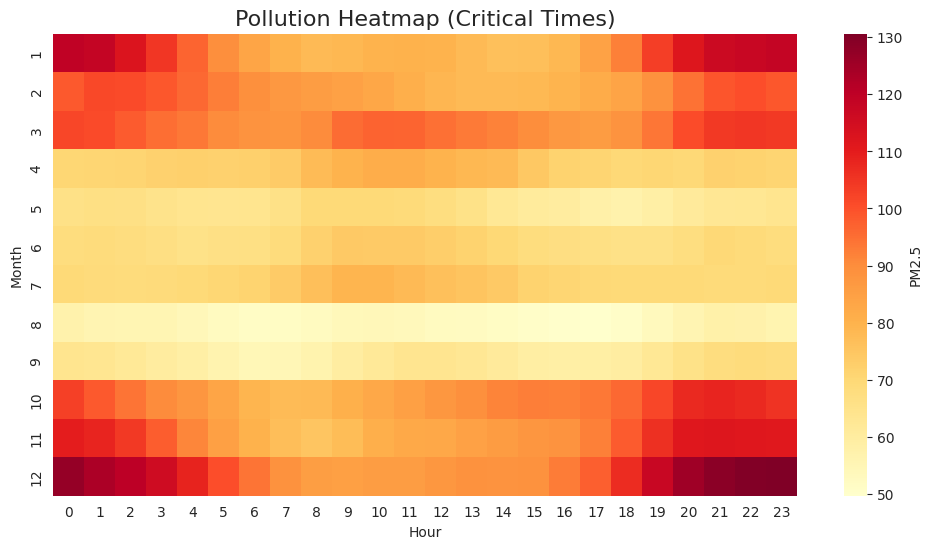

In [160]:
# Heatmap
pivot_heatmap = df.pivot_table(index=df['datetime'].dt.month, columns=df['datetime'].dt.hour, values='PM2.5', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_heatmap, cmap='YlOrRd', cbar_kws={'label': 'PM2.5'})
plt.title('Pollution Heatmap (Critical Times)', fontsize=16)
plt.ylabel('Month'); plt.xlabel('Hour')
plt.show()

Heatmap ini menampilkan tingkat polusi PM2.5 di berbagai bulan dan jam dalam sehari.
* Tingkat polusi tertinggi terjadi pada jam malam hingga dini hari (pukul 20.00 hingga 03.00), terutama pada bulan Januari dan Desember (musim dingin).

* Malam hari dan pagi hari secara konsisten menunjukkan tingkat polusi yang lebih tinggi, kemungkinan disebabkan oleh inversi suhu dan berkurangnya sirkulasi udara.

* Polusi secara signifikan lebih rendah pada siang hari, dengan udara yang lebih bersih pada sore dan awal malam hari.

### Analisis Lanjutan (Machine Learning)

In [190]:
df = pd.read_csv("main_data_clean_final.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
features = ['PM2.5', 'TEMP', 'RAIN', 'WSPM']
X = df[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
X['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = X.groupby('Cluster').mean().sort_values(by='PM2.5')
print("Rata-rata Karakteristik per Cluster:")
display(cluster_summary)

Rata-rata Karakteristik per Cluster:


,PM2.5,TEMP,RAIN,WSPM
Cluster,,,,
1,51.82,19.74,0.05,2.09
2,71.85,21.07,17.05,2.51
0,125.68,3.53,0.01,1.15


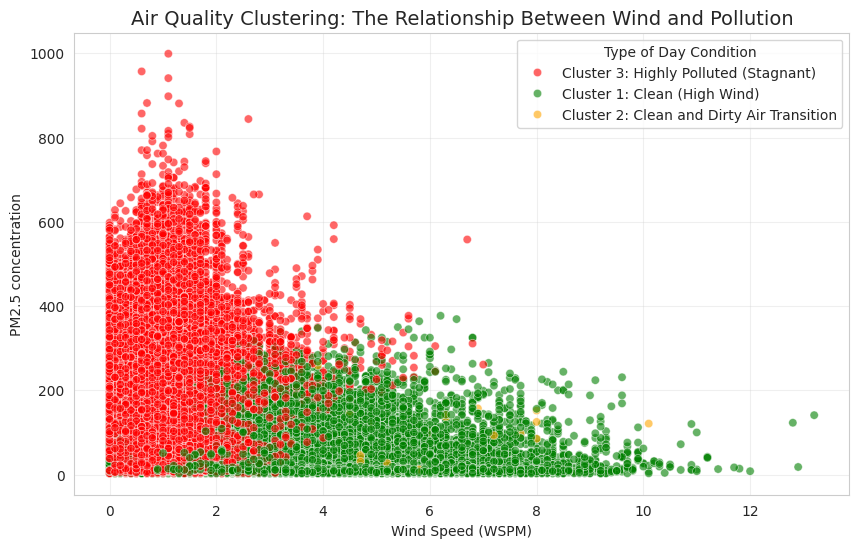

In [194]:
plt.figure(figsize=(10, 6))
sorted_indices = cluster_summary.index
color_map = {sorted_indices[0]: 'green', sorted_indices[1]: 'orange', sorted_indices[2]: 'red'}
labels_map = {sorted_indices[0]: 'Cluster 1: Clean (High Wind)',
              sorted_indices[1]: 'Cluster 2: Clean and Dirty Air Transition',
              sorted_indices[2]: 'Cluster 3: Highly Polluted (Stagnant)'}

sns.scatterplot(x='WSPM', y='PM2.5', hue=X['Cluster'],
                palette=color_map, data=X, alpha=0.6)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [labels_map[int(l)] for l in labels]
plt.legend(handles, new_labels, title="Type of Day Condition")

plt.title('Air Quality Clustering: The Relationship Between Wind and Pollution', fontsize=14)
plt.xlabel('Wind Speed (WSPM)')
plt.ylabel('PM2.5 concentration')
plt.grid(True, alpha=0.3)
plt.show()

### **Interpretasi Analisis Clustering (Machine Learning)**

**Tujuan Penggunaan Model:**
Model *K-Means Clustering* digunakan untuk mengelompokkan pola cuaca dan polusi secara otomatis (unsupervised) tanpa aturan manual. Tujuannya adalah mengidentifikasi karakteristik dominan yang menciptakan kondisi kualitas udara.

**Insight dari Hasil Model:**
Berdasarkan pembagian 3 cluster yang terbentuk:

1.  **Cluster Bersih (Hijau):**
    * Ditandai dengan rata-rata **PM2.5 yang rendah (50)** , **suhu bervariasi**, dan **Kecepatan Angin (WSPM) yang relatif tinggi**.
    * *Interpretasi:* Angin kencang terbukti efektif membersihkan udara secara alami.
2.  **Cluster 2: Transisi / Moderate (Oranye)**

    * Ditandai dengan **M2.5 berada di tingkat menengah (72-125)**. **Kecepatan angin tidak kencang**. Curah hujan (RAIN) sering kali masuk di kategori ini (hujan ringan).
    * *Interpretasi:* Ini adalah kondisi dimana polusi tetap ada, namun faktor cuaca (sedikit angin/hujan) mencegahnya menjadi level berbahaya. Ini sering terjadi saat pergantian musim atau saat badai baru akan datang atau pergi.

3.  **Cluster Sangat Polusi (Merah):**
    * Ditandai dengan rata-rata **PM2.5 sangat tinggi** dan **Angin yang sangat lemah (mendekati 0)**.
    * *Interpretasi:* Kondisi udara berbahaya terjadi ketika atmosfer stagnan (tidak ada angin), menyebabkan akumulasi polutan yang menyebabkan **Udara Sangat Berpolusi**.

**Kesimpulan:**
Penerapan Machine Learning memperkuat temuan EDA sebelumnya bahwa **faktor kecepatan angin** adalah variabel kunci kualitas udara di Beijing. Tanpa angin yang cukup (masuk ke Cluster Transisi atau Stagnan), akumulasi polutan di Beijing tidak dapat terurai secara alami sehingga udara berpolusi.

## Conclusion

**1. Bagaimana tren rata-rata bulanan tingkat polusi PM2.5 di Beijing sepanjang tahun 2013 hingga 2017, dan pada bulan apa polusi mencapai titik tertinggi secara konsisten ?**
- Kesimpulan: Polusi PM2.5 memiliki pola musiman yang fluktuatif (Siklus U-Shape). Kualitas udara memburuk secara drastis pada musim dingin (Desember - Februari) dan membaik pada musim semi hingga panas.

- Insight: Peningkatan di musim dingin kemungkinan besar didorong oleh penggunaan sistem pemanas (heating system) yang masif dan fenomena inversi suhu.

**2. Stasiun manakah yang memiliki rata-rata tingkat polusi tertinggi dan terendah, serta bagaimana perbandingan kualitas udara antara area pusat kota (seperti Dongsi) dibandingkan area pinggiran (seperti Huairou) ?**

- Kesimpulan: Terdapat kesenjangan nyata antara pusat kota dan pinggiran. Stasiun di area urban padat (seperti Dongsi dan Wanshouxigong) mencatat tingkat polusi tertinggi, sedangkan stasiun di utara dekat pegunungan (seperti Huairou dan Dingling) relatif lebih bersih.

- Insight: Ini mengindikasikan bahwa sumber polusi utama bersifat lokal (aktivitas perkotaan dan lalu lintas), bukan sekadar faktor alam.

**3. Seberapa signifikan pengaruh faktor cuaca, spesifiknya Curah Hujan (RAIN) dan Kecepatan Angin (WSPM), terhadap penurunan konsentrasi PM2.5 ?**

- Kesimpulan: Faktor cuaca sangat berpengaruh dengan penurunan konsentrasi polutan. Dengan Kecepatan Angin (WSPM) sebagai pembersih alami yang paling dominan.

- Bukti: Analisis korelasi dan hasil Clustering (K-Means) menunjukkan konsistensi bahwa hari dengan angin kencang selalu berkorelasi dengan level PM2.5 yang rendah (Cluster Bersih). Sebaliknya, kondisi udara berbahaya terjadi saat angin stagnan/lemah.

**4. Seberapa besar risiko polutan bagi kesehatan masyarakat?**

- Kesimpulan: Analisis kategori AQI menunjukkan bahwa meskipun stasiun pinggiran terlihat "bersih" secara rata-rata, mereka tetap mengalami hari-hari dengan status "Hazardous" (Berbahaya).

- Insight: Fluktuasi kualitas udara harian sangat tajam terjadi di Kota Beijing. Waktu paling kritis untuk dihindari adalah malam hari di musim dingin, di mana akumulasi polutan mencapai puncaknya.